In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# If your path has space, use double quotes
# Pandas will start looking from where your current python file is located. Therefore you can move from your 
# current directory to where your data is located with '..'
#For eg: pd.read_csv('../../../data_folder/data.csv') - Will go 3 levels up and then into a data_folder (assuming it's there) Or
# pd.read_csv('data_folder/data.csv') - assuming your data_folder is in the same directory as your .py file.

# df_ir = pd.read_csv(r"Project Files/incident_event_log_train.csv",parse_dates=[9,11,13,34,35])
df_ir = pd.read_csv(r"Project Files/incident_event_log_train.csv",parse_dates=[9,11,13,34,35],infer_datetime_format=True,dayfirst=True)

In [4]:
# Since sys_created_at and resolved_at fields were not converted to datetime objects (may be because of some invalid
# entries in some columns), we will use to_datetime to convert these to datetime fields.
#Use dayfirst = True so that date and month are consistently interpreted by Pandas

df_ir['sys_created_at']= pd.to_datetime(df_ir['sys_created_at'],errors ='coerce',dayfirst=True,infer_datetime_format=True)
df_ir['resolved_at']= pd.to_datetime(df_ir['resolved_at'],errors ='coerce',dayfirst=True,infer_datetime_format=True)

In [5]:
df_ir.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00


In [6]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  bool          
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  bool          
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  sys_created_by           119998 non-null  object        
 11  sys_created_at           77644 non-null   datetime64[ns]
 12  sys_updated_by  

In [7]:
# steps to delete unwanted columns 
#Delete the following columns since most of the values in these columns are irrelevant values ('?'): 
#cmdb_ci : 119562 values are '?'
#problem_id : 118061 values are '?'
#rfc : 119116 values are '?'
#vendor : 119816 values are '?'
# caused_by : 119980 values are '?'

delete_list = ['cmdb_ci','problem_id','rfc','vendor','caused_by']
df_ir.drop(delete_list, axis=1,inplace = True)
df_ir


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,INC0029231,Resolved,True,0,0,8,True,Caller 2321,Opened by 17,2016-05-13 11:46:00,...,3 - Moderate,Group 70,Resolver 13,False,True,Do Not Notify,code 7,Resolved by 11,2016-05-13 12:15:00,2016-05-18 13:07:00
119994,INC0029231,Closed,False,0,0,9,True,Caller 2321,Opened by 17,2016-05-13 11:46:00,...,3 - Moderate,Group 70,Resolver 13,False,True,Do Not Notify,code 7,Resolved by 11,2016-05-13 12:15:00,2016-05-18 13:07:00
119995,INC0029232,Resolved,True,0,0,0,True,Caller 382,Opened by 108,2016-05-13 11:48:00,...,3 - Moderate,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 12:07:00
119996,INC0029232,Closed,False,0,0,1,True,Caller 382,Opened by 108,2016-05-13 11:48:00,...,3 - Moderate,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 12:07:00


In [8]:
df_ir.shape

(119998, 31)

In [9]:
# Calcualte the difference between Resolved date and opened date to get the time to final closure time in days,hours and minutes
# Store the data in a new column

df_ir['Time_to_resolve'] = df_ir['resolved_at'] - df_ir['opened_at']

In [10]:
type(df_ir['Time_to_resolve'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [11]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   number                   119998 non-null  object         
 1   incident_state           119998 non-null  object         
 2   active                   119998 non-null  bool           
 3   reassignment_count       119998 non-null  int64          
 4   reopen_count             119998 non-null  int64          
 5   sys_mod_count            119998 non-null  int64          
 6   made_sla                 119998 non-null  bool           
 7   caller_id                119998 non-null  object         
 8   opened_by                119998 non-null  object         
 9   opened_at                119998 non-null  datetime64[ns] 
 10  sys_created_by           119998 non-null  object         
 11  sys_created_at           77644 non-null   datetime64[ns] 
 12  sy

In [12]:
# Convert data in new column to minutes. We will use this column as the label column.
# During prediction, we will add the data in this column to the opened_at date to get the closed_at date using the below formula
# eg formula to add minutes to date to get new date: df_ir['opened_at'][0] + pd.Timedelta(minutes = 7844)

df_ir['Time_to_resolve'] = df_ir['Time_to_resolve'].apply(lambda x: x.to_timedelta64()/np.timedelta64(1,'m') if pd.notnull(x) else np.NaN)

In [13]:
df_ir[df_ir['Time_to_resolve'].isna()] 

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve
173,INC0000093,Resolved,True,0,0,0,True,Caller 3545,Opened by 131,2016-02-29 08:56:00,...,Group 70,?,True,False,Do Not Notify,code 7,Resolved by 66,NaT,2016-03-05 10:00:00,NaN
174,INC0000093,Closed,False,0,0,1,True,Caller 3545,Opened by 131,2016-02-29 08:56:00,...,Group 70,?,True,False,Do Not Notify,code 7,Resolved by 66,NaT,2016-03-05 10:00:00,NaN
423,INC0000160,Resolved,True,0,0,0,True,Caller 4758,Opened by 40,2016-02-29 10:18:00,...,Group 70,Resolver 175,True,False,Do Not Notify,code 7,Resolved by 21,NaT,2016-03-05 11:00:00,NaN
424,INC0000160,Closed,False,0,0,1,True,Caller 4758,Opened by 40,2016-02-29 10:18:00,...,Group 70,Resolver 175,True,False,Do Not Notify,code 7,Resolved by 21,NaT,2016-03-05 11:00:00,NaN
548,INC0000199,Resolved,True,0,0,0,True,Caller 4145,Opened by 301,2016-02-29 11:06:00,...,Group 70,Resolver 149,True,False,Do Not Notify,code 11,Resolved by 133,NaT,2016-03-05 12:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119399,INC0029091,Closed,False,0,0,1,True,Caller 383,Opened by 108,2016-05-13 08:24:00,...,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 09:07:00,NaN
119633,INC0029145,Resolved,True,0,0,0,True,Caller 3032,Opened by 108,2016-05-13 09:50:00,...,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 11:07:00,NaN
119634,INC0029145,Closed,False,0,0,1,True,Caller 3032,Opened by 108,2016-05-13 09:50:00,...,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 11:07:00,NaN
119995,INC0029232,Resolved,True,0,0,0,True,Caller 382,Opened by 108,2016-05-13 11:48:00,...,Group 70,Resolver 56,False,False,Do Not Notify,code 6,Resolved by 52,NaT,2016-05-18 12:07:00,NaN


In [14]:
df_ir['Time_to_resolve'].isna().sum()

2861

In [15]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  bool          
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  bool          
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  sys_created_by           119998 non-null  object        
 11  sys_created_at           77644 non-null   datetime64[ns]
 12  sys_updated_by  

In [33]:
type(df_ir['Time_to_resolve'][0])

numpy.float64

In [34]:
df_ir.loc[: ,['Time_to_resolve','opened_at','resolved_at']].head(10)

,Time_to_resolve,opened_at,resolved_at
0,613.0,2016-02-29 01:16:00,2016-02-29 11:29:00
1,613.0,2016-02-29 01:16:00,2016-02-29 11:29:00
2,613.0,2016-02-29 01:16:00,2016-02-29 11:29:00
3,613.0,2016-02-29 01:16:00,2016-02-29 11:29:00
4,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00
5,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00
6,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00
7,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00
8,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00
9,1752.0,2016-02-29 04:40:00,2016-03-01 09:52:00


In [35]:
# eg formula to add minutes to date to get new date: df_ir['opened_at'][0] + pd.Timedelta(minutes = 7844)
# this formula will be used when we need to convert the result(in minutes) back to closed_at date and time

# df_ir['opened_at'][0] + pd.Timedelta(minutes = 7844)

In [16]:
# deleting system created fields as they are generally automatically created by the system/db

delete_list = ['sys_created_by','sys_created_at','sys_updated_by','sys_updated_at']
df_ir.drop(delete_list, axis=1,inplace = True)

In [17]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  bool          
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  bool          
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  contact_type             119998 non-null  object        
 11  location                 119998 non-null  object        
 12  category        

In [38]:
# Function to capture changes to data in features before deleting those rows from the dataset

col_lst = ['category','subcategory','u_symptom','assignment_group','assigned_to']

for i in col_lst:
    df_ir[i + "_chngd"] = np.where(df_ir.groupby(['number'])[i].transform('nunique')>1,True,False)

In [18]:
df_ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  bool          
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  bool          
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  contact_type             119998 non-null  object        
 11  location                 119998 non-null  object        
 12  category        

In [40]:
df_ir.describe()

,reassignment_count,reopen_count,sys_mod_count,Time_to_resolve
count,119998.000000,119998.000000,119998.000000,117137.000000
mean,1.151236,0.021025,5.199312,16813.689415
std,1.782823,0.196173,7.804628,39972.765107
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,340.000000
50%,1.000000,0.000000,3.000000,4976.000000
75%,2.000000,0.000000,7.000000,16402.000000
max,27.000000,8.000000,129.000000,484210.000000


In [41]:
df_ir[df_ir['resolved_at'] == df_ir['opened_at']]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
30688,INC0006901,Resolved,True,0,0,0,True,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False
30689,INC0006901,Closed,False,0,0,1,False,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False
43926,INC0009885,Active,True,0,0,0,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
43927,INC0009885,Resolved,True,0,0,2,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
43928,INC0009885,Closed,False,0,0,3,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119190,INC0029033,Resolved,True,0,0,1,True,Caller 290,Opened by 305,2016-05-12 21:45:00,...,code 6,Resolved by 134,2016-05-12 21:45:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119191,INC0029033,Closed,False,0,0,2,True,Caller 290,Opened by 305,2016-05-12 21:45:00,...,code 6,Resolved by 134,2016-05-12 21:45:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119198,INC0029036,New,True,0,0,0,True,Caller 290,Opened by 305,2016-05-12 21:54:00,...,code 6,Resolved by 134,2016-05-12 21:54:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119199,INC0029036,Resolved,True,0,0,1,True,Caller 290,Opened by 305,2016-05-12 21:54:00,...,code 6,Resolved by 134,2016-05-12 21:54:00,2016-05-17 22:07:00,0.0,False,False,False,False,False


In [42]:
df_ir[df_ir['number'] == 'INC0006901']

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
30688,INC0006901,Resolved,True,0,0,0,True,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False
30689,INC0006901,Closed,False,0,0,1,False,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False


In [43]:
import seaborn as sns
sns.set()

In [44]:
df_ir.select_dtypes(include=['int64','float64']).columns.tolist()

['reassignment_count', 'reopen_count', 'sys_mod_count', 'Time_to_resolve']

C:\Users\Anu\.conda\envs\MLchallenge3IR\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


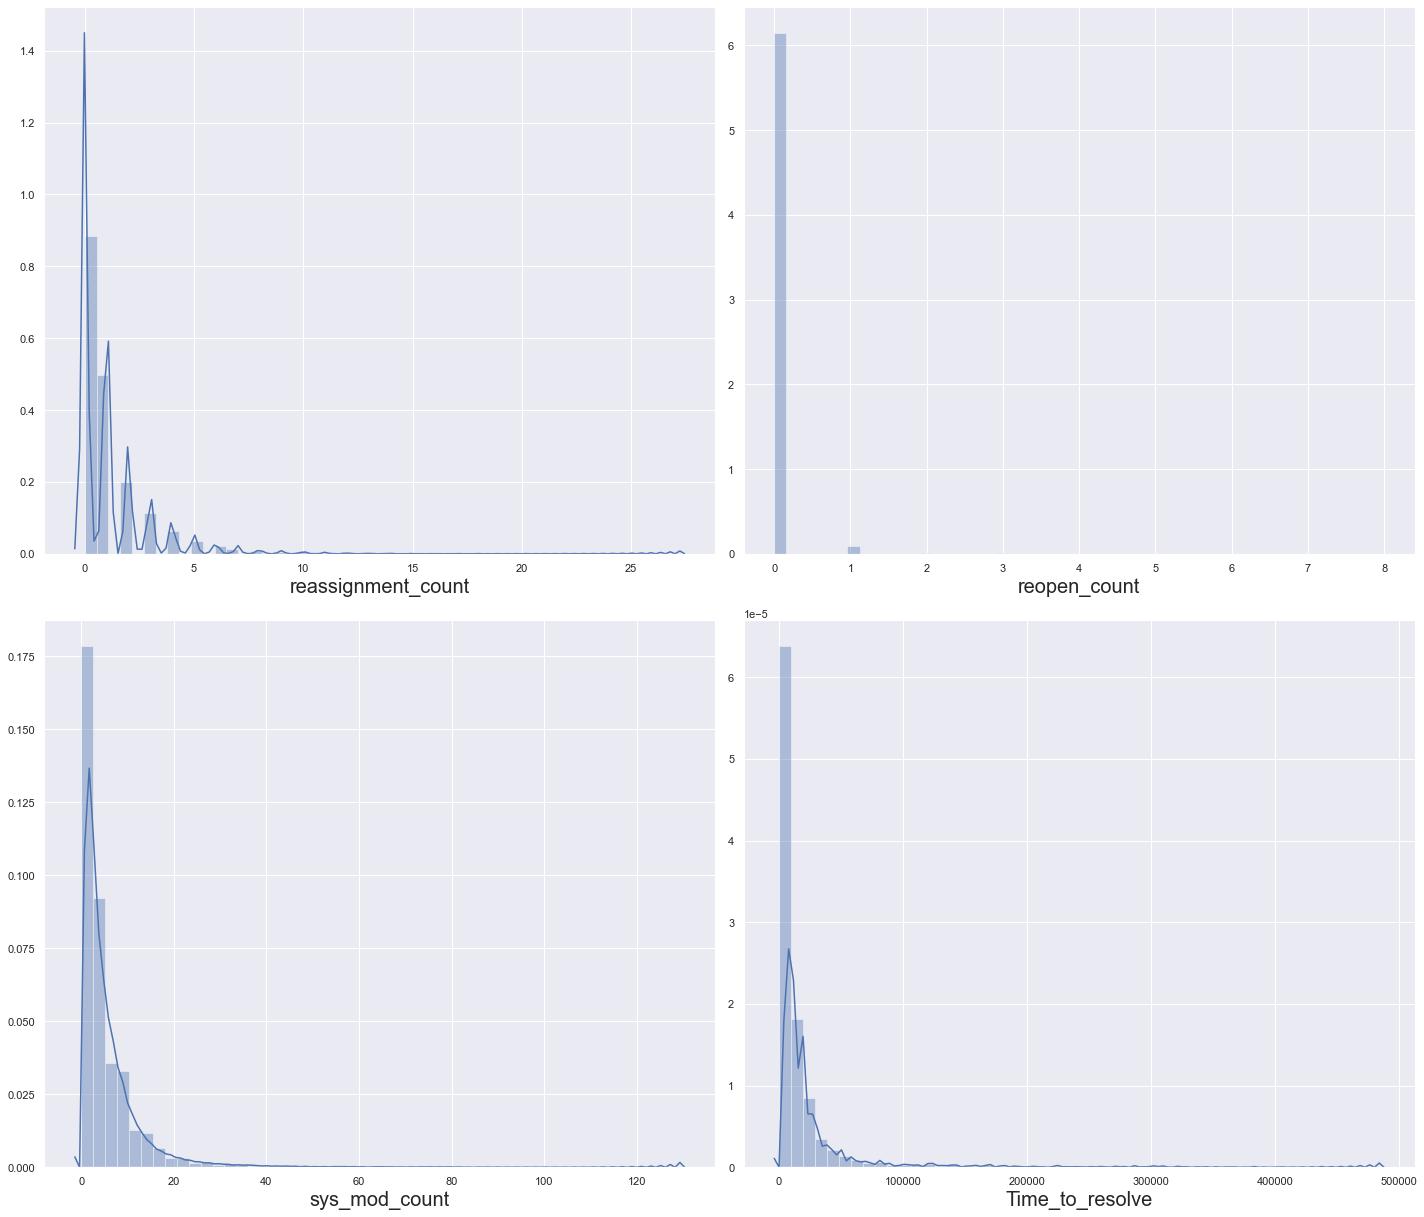

In [46]:
# Distribution for numerical columns

plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in df_ir.select_dtypes(include=['int64','float64']).columns.tolist():
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_ir[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()    


In [47]:
df_ir[df_ir['Time_to_resolve'] > 144000]['number'].nunique()

251

In [48]:
df_ir[df_ir['Time_to_resolve'] < 1]['number'].unique()

array(['INC0006901', 'INC0009885', 'INC0011442', 'INC0011573',
       'INC0024150', 'INC0024151', 'INC0024526', 'INC0025591',
       'INC0025593', 'INC0025598', 'INC0026070', 'INC0026086',
       'INC0026090', 'INC0026605', 'INC0026608', 'INC0027670',
       'INC0027671', 'INC0027677', 'INC0027678', 'INC0027679',
       'INC0027682', 'INC0028100', 'INC0028101', 'INC0028107',
       'INC0028568', 'INC0028569', 'INC0028571', 'INC0028574',
       'INC0028575', 'INC0028576', 'INC0029025', 'INC0029030',
       'INC0029033', 'INC0029036'], dtype=object)

In [49]:
df_ir.loc[df_ir['number'].isin(df_ir[df_ir['Time_to_resolve'] < 1]['number'].unique().tolist())]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
30688,INC0006901,Resolved,True,0,0,0,True,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False
30689,INC0006901,Closed,False,0,0,1,False,Caller 298,Opened by 240,2016-03-14 17:05:00,...,code 7,Resolved by 115,2016-03-14 17:05:00,2016-03-24 18:52:00,0.0,False,False,False,False,False
43926,INC0009885,Active,True,0,0,0,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
43927,INC0009885,Resolved,True,0,0,2,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
43928,INC0009885,Closed,False,0,0,3,True,Caller 1904,Opened by 180,2016-03-22 10:20:00,...,code 6,Resolved by 85,2016-03-22 10:20:00,2016-03-27 10:59:00,0.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119190,INC0029033,Resolved,True,0,0,1,True,Caller 290,Opened by 305,2016-05-12 21:45:00,...,code 6,Resolved by 134,2016-05-12 21:45:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119191,INC0029033,Closed,False,0,0,2,True,Caller 290,Opened by 305,2016-05-12 21:45:00,...,code 6,Resolved by 134,2016-05-12 21:45:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119198,INC0029036,New,True,0,0,0,True,Caller 290,Opened by 305,2016-05-12 21:54:00,...,code 6,Resolved by 134,2016-05-12 21:54:00,2016-05-17 22:07:00,0.0,False,False,False,False,False
119199,INC0029036,Resolved,True,0,0,1,True,Caller 290,Opened by 305,2016-05-12 21:54:00,...,code 6,Resolved by 134,2016-05-12 21:54:00,2016-05-17 22:07:00,0.0,False,False,False,False,False


In [223]:
df_ir.loc[df_ir['number'] == 'INC0003982',['number','category','subcategory','assignment_group','assigned_to','u_symptom','category_chngd','subcategory_chngd','u_symptom_chngd','assignment_group_chngd','assigned_to_chngd']]

,number,category,subcategory,assignment_group,assigned_to,u_symptom,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
18180,INC0003982,Category 40,Subcategory 43,Group 70,Resolver 192,Symptom 158,True,True,True,True,True
18181,INC0003982,Category 37,Subcategory 135,?,?,Symptom 257,True,True,True,True,True
18182,INC0003982,Category 37,Subcategory 135,?,?,Symptom 257,True,True,True,True,True
18183,INC0003982,Category 37,Subcategory 135,Group 50,?,Symptom 257,True,True,True,True,True
18184,INC0003982,Category 37,Subcategory 135,Group 50,?,Symptom 257,True,True,True,True,True
18185,INC0003982,Category 37,Subcategory 135,Group 50,Resolver 82,Symptom 257,True,True,True,True,True
18186,INC0003982,Category 37,Subcategory 135,Group 50,Resolver 82,Symptom 257,True,True,True,True,True
18187,INC0003982,Category 37,Subcategory 135,Group 50,Resolver 82,Symptom 257,True,True,True,True,True
18188,INC0003982,Category 37,Subcategory 135,Group 50,Resolver 82,Symptom 257,True,True,True,True,True
18189,INC0003982,Category 37,Subcategory 135,Group 50,Resolver 82,Symptom 257,True,True,True,True,True


In [224]:
df_ir['category_chngd'].value_counts()

False    109629
True      10369
Name: category_chngd, dtype: int64

In [225]:
df_ir[df_ir['incident_state'] == 'Closed']['number'].nunique()

20768

In [19]:
# Creating a new dataframe with only unique Closed incidents with the highest value in the sys_mod_count column
# df_clsd_uq now will have only closed incidents which have the highest value in the sys_mod_count column

closed_incidents = df_ir[df_ir['incident_state'] == 'Closed']
df_clsd_uq = closed_incidents.sort_values('sys_mod_count', ascending = False).drop_duplicates(['number'])

In [20]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20768 entries, 5627 to 119996
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20768 non-null  object        
 1   incident_state           20768 non-null  object        
 2   active                   20768 non-null  bool          
 3   reassignment_count       20768 non-null  int64         
 4   reopen_count             20768 non-null  int64         
 5   sys_mod_count            20768 non-null  int64         
 6   made_sla                 20768 non-null  bool          
 7   caller_id                20768 non-null  object        
 8   opened_by                20768 non-null  object        
 9   opened_at                20768 non-null  datetime64[ns]
 10  contact_type             20768 non-null  object        
 11  location                 20768 non-null  object        
 12  category                 207

In [228]:
df_clsd_uq.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
5627,INC0001349,Closed,False,2,0,129,False,Caller 1293,Opened by 381,2016-03-02 14:13:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 291,3 - Low,2 - Medium,4 - Low,Group 67,Resolver 223,True,True,Do Not Notify,code 6,Resolved by 9,2017-01-30 18:29:00,2017-02-04 19:00:00,481216.0,False,False,False,True,True
18210,INC0003982,Closed,False,4,1,117,False,Caller 3352,Opened by 59,2016-03-08 08:54:00,Phone,Location 69,Category 37,Subcategory 135,Symptom 257,2 - Medium,2 - Medium,3 - Moderate,Group 47,Resolver 117,True,True,Do Not Notify,code 6,Resolved by 106,2016-12-13 17:54:00,2016-12-18 18:00:00,403740.0,True,True,True,True,True
7816,INC0001839,Closed,False,0,0,116,False,Caller 2455,Opened by 441,2016-03-03 11:23:00,Phone,Location 143,Category 45,Subcategory 47,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,True,True,Do Not Notify,code 7,Resolved by 188,2017-02-02 17:33:00,2017-02-07 18:00:00,484210.0,False,False,False,False,False
32861,INC0007343,Closed,False,1,0,114,False,Caller 5317,Opened by 17,2016-03-15 14:23:00,Phone,Location 161,Category 46,Subcategory 47,Symptom 94,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,False,True,Do Not Notify,code 7,Resolved by 86,2017-02-03 18:04:00,2017-02-08 18:07:00,468221.0,True,True,True,True,False
1019,INC0000343,Closed,False,0,0,106,False,Caller 409,Opened by 381,2016-02-29 15:14:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 314,2 - Medium,3 - Low,4 - Low,Group 31,Resolver 182,False,True,Do Not Notify,code 1,Resolved by 165,2016-12-22 09:31:00,2016-12-27 10:00:00,427337.0,False,False,False,False,False


In [47]:
df_clsd_uq[df_clsd_uq.number.isin(['INC0011262', 'INC0020383', 'INC0020718', 'INC0012815', 'INC0003529', 'INC0025734', 'INC0015300'])]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
49505,INC0011262,Closed,False,2,0,82,True,Caller 5281,Opened by 58,2016-03-24 17:33:00,...,code 7,Resolved by 134,2016-03-24 23:57:00,2016-03-29 23:59:00,384.0,False,True,True,True,False
85167,INC0020383,Closed,False,0,0,66,False,Caller 3067,Opened by 500,2016-04-18 12:06:00,...,code 8,Resolved by 139,2016-04-22 09:12:00,2016-04-27 10:07:00,5586.0,False,False,False,False,False
86459,INC0020718,Closed,False,22,1,56,False,Caller 4919,Opened by 17,2016-04-19 08:20:00,...,code 6,Resolved by 215,2016-05-19 10:43:00,2016-05-24 11:07:00,43343.0,False,False,False,True,True
55517,INC0012815,Closed,False,20,1,46,False,Caller 5181,Opened by 8,2016-03-30 08:20:00,...,code 6,Resolved by 15,2016-04-18 12:51:00,2016-04-23 13:07:00,27631.0,False,False,False,True,True
15868,INC0003529,Closed,False,9,0,45,False,Caller 927,Opened by 386,2016-03-07 13:31:00,...,code 6,Resolved by 62,2016-06-01 10:27:00,2016-06-06 11:07:00,123656.0,False,False,False,True,False
65396,INC0015300,Closed,False,1,0,42,False,Caller 1983,Opened by 17,2016-04-05 09:19:00,...,code 6,Resolved by 53,2016-06-30 14:10:00,2016-07-05 15:00:00,124131.0,False,False,False,True,False
106167,INC0025734,Closed,False,11,1,42,False,Caller 1847,Opened by 17,2016-05-04 09:47:00,...,code 7,Resolved by 139,2016-05-06 14:39:00,2016-05-11 15:07:00,3172.0,False,False,False,True,True


In [229]:
#Checking the correlation between reassignment count and 'assignment_group_chngd','assigned_to_chngd' 

df_clsd_uq[['reassignment_count','assignment_group_chngd','assigned_to_chngd']].corr()
#df_clsd_uq[['assignment_group','assigned_to'

,reassignment_count,assignment_group_chngd,assigned_to_chngd
reassignment_count,1.000000,0.643031,0.212663
assignment_group_chngd,0.643031,1.000000,0.161143
assigned_to_chngd,0.212663,0.161143,1.000000


In [21]:
df_clsd_uq.reset_index(drop = True, inplace = True)

In [23]:
df_clsd_uq.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve
0,INC0001349,Closed,False,2,0,129,False,Caller 1293,Opened by 381,2016-03-02 14:13:00,...,Group 67,Resolver 223,True,True,Do Not Notify,code 6,Resolved by 9,2017-01-30 18:29:00,2017-02-04 19:00:00,481216.0
1,INC0003982,Closed,False,4,1,117,False,Caller 3352,Opened by 59,2016-03-08 08:54:00,...,Group 47,Resolver 117,True,True,Do Not Notify,code 6,Resolved by 106,2016-12-13 17:54:00,2016-12-18 18:00:00,403740.0
2,INC0001839,Closed,False,0,0,116,False,Caller 2455,Opened by 441,2016-03-03 11:23:00,...,Group 31,Resolver 207,True,True,Do Not Notify,code 7,Resolved by 188,2017-02-02 17:33:00,2017-02-07 18:00:00,484210.0
3,INC0007343,Closed,False,1,0,114,False,Caller 5317,Opened by 17,2016-03-15 14:23:00,...,Group 31,Resolver 207,False,True,Do Not Notify,code 7,Resolved by 86,2017-02-03 18:04:00,2017-02-08 18:07:00,468221.0
4,INC0000343,Closed,False,0,0,106,False,Caller 409,Opened by 381,2016-02-29 15:14:00,...,Group 31,Resolver 182,False,True,Do Not Notify,code 1,Resolved by 165,2016-12-22 09:31:00,2016-12-27 10:00:00,427337.0


# Data Visualizations:

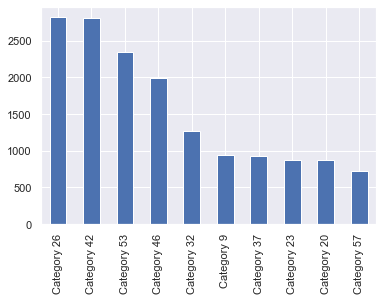

In [50]:
# Top 10 categories under which tickets were logged

#df_clsd_uq['category'].value_counts().plot(kind = 'bar')
df_clsd_uq['category'].value_counts().nlargest(10).plot(kind = 'bar')

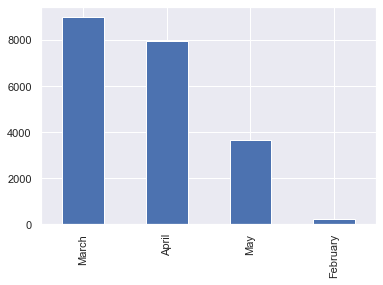

In [58]:
# tickets logged by month

df_clsd_uq['opened_at'].dt.month_name().value_counts().plot(kind = 'bar')

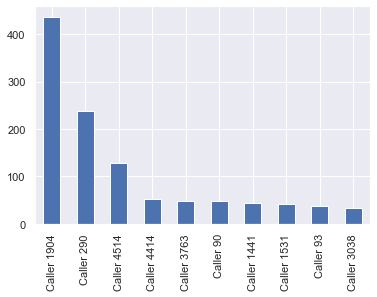

In [59]:
# Number of incidents by top ten caller ID's

df_clsd_uq['caller_id'].value_counts().nlargest(10).plot(kind = 'bar')

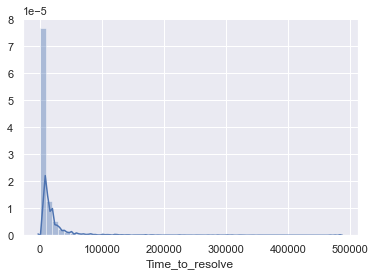

In [71]:
sns.distplot(df_clsd_uq[df_clsd_uq['Time_to_resolve'].isna() == False]['Time_to_resolve'])

In [22]:
df_clsd_uq.last_valid_index()

20767

In [232]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# TO measure correlation between a pair of a continuous feature and a categorical feature

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [233]:
correlation_ratio(df_clsd_uq['assigned_to'], df_clsd_uq['reassignment_count'])

0.36269335631207006

In [234]:
correlation_ratio(df_clsd_uq['assignment_group'], df_clsd_uq['reassignment_count'])

0.31337540956808674

In [235]:
df_clsd_uq.shape

(20768, 33)

In [236]:
df_clsd_uq['category_chngd'].value_counts()

False    19646
True      1122
Name: category_chngd, dtype: int64

In [237]:
pd.set_option('display.max_columns',36)

In [238]:
df_clsd_uq['Time_to_resolve'].describe()

count     19350.000000
mean      11260.951473
std       32865.611923
min           0.000000
25%          30.000000
50%        1476.000000
75%        9923.500000
max      484210.000000
Name: Time_to_resolve, dtype: float64

In [239]:
df_clsd_uq[df_clsd_uq['Time_to_resolve'] < 50][['opened_at','resolved_at','Time_to_resolve']]

,opened_at,resolved_at,Time_to_resolve
243,2016-03-23 14:44:00,2016-03-23 14:50:00,6.0
496,2016-03-16 10:15:00,2016-03-16 11:01:00,46.0
501,2016-03-20 11:03:00,2016-03-20 11:06:00,3.0
711,2016-03-15 11:27:00,2016-03-15 11:32:00,5.0
816,2016-03-14 11:03:00,2016-03-14 11:42:00,39.0
...,...,...,...
20705,2016-03-30 20:06:00,2016-03-30 20:15:00,9.0
20716,2016-03-31 01:02:00,2016-03-31 01:16:00,14.0
20722,2016-03-31 08:36:00,2016-03-31 08:57:00,21.0
20741,2016-03-30 11:45:00,2016-03-30 11:58:00,13.0


In [67]:
df_clsd_uq['Time_to_resolve'].isna().sum()

1418

In [68]:
np.percentile(df_clsd_uq['Time_to_resolve'][df_clsd_uq['Time_to_resolve'].notnull()],98.7)

142829.55599999998

In [69]:
res_t = np.percentile(df_clsd_uq['Time_to_resolve'][df_clsd_uq['Time_to_resolve'].notnull()],98.7)

In [70]:
df_clsd_uq['Time_to_resolve'][df_clsd_uq['Time_to_resolve'] > res_t].count()

252

In [71]:
df_clsd_uq['Time_to_resolve'][df_clsd_uq['Time_to_resolve'] < res_t]

40         384.0
90       40509.0
96       42013.0
104       5586.0
120      71934.0
          ...   
20705        9.0
20716       14.0
20722       21.0
20741       13.0
20766        6.0
Name: Time_to_resolve, Length: 19098, dtype: float64

In [72]:
19098 + 1418

20516

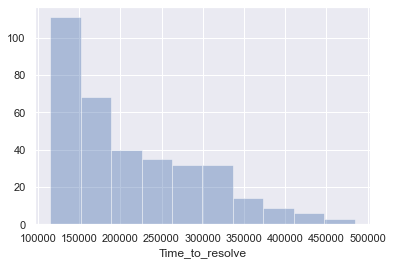

In [73]:
sns.distplot(df_clsd_uq['Time_to_resolve'].sort_values()[19000::],kde=False)

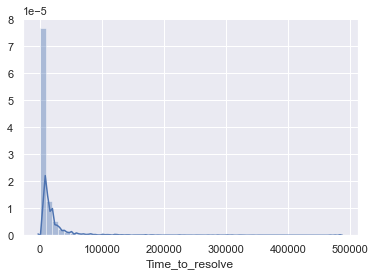

In [74]:
sns.distplot(df_clsd_uq['Time_to_resolve'])

In [541]:
# 5 days  = 7200 minutes

In [75]:
df_clsd_uq['Time_to_resolve'].sort_values()[0:50]

15577    0.0
13469    0.0
13437    0.0
14099    0.0
15598    0.0
16216    0.0
20398    0.0
19330    0.0
12118    0.0
15834    0.0
15833    0.0
13082    0.0
15810    0.0
16181    0.0
15608    0.0
15625    0.0
15635    0.0
15798    0.0
16109    0.0
16156    0.0
13217    0.0
16154    0.0
15784    0.0
13281    0.0
14073    0.0
14067    0.0
17294    0.0
15994    0.0
16076    0.0
15892    0.0
16093    0.0
16274    0.0
12550    0.0
16074    0.0
13472    1.0
16101    1.0
18910    1.0
16108    1.0
13568    1.0
13569    1.0
16065    1.0
16053    1.0
18905    1.0
16052    1.0
16112    1.0
13364    1.0
16118    1.0
16043    1.0
16119    1.0
16120    1.0
Name: Time_to_resolve, dtype: float64

In [76]:
df_clsd_uq['Time_to_resolve'].sort_values()[19100:19350]

291    144320.0
276    145144.0
290    145205.0
228    145223.0
252    145517.0
         ...   
25     438836.0
22     438987.0
3      468221.0
0      481216.0
2      484210.0
Name: Time_to_resolve, Length: 250, dtype: float64

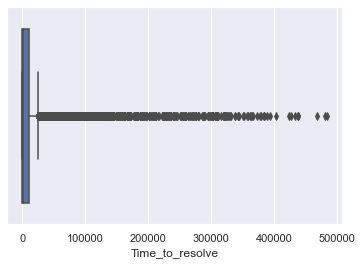

In [79]:
sns.boxplot(df_clsd_uq['Time_to_resolve'])

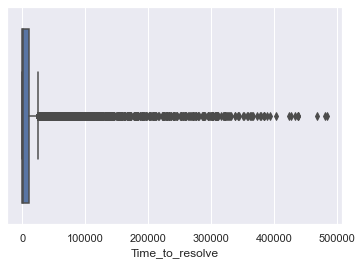

In [80]:
sns.boxplot(df_clsd_uq['Time_to_resolve'].sort_values()[0:20600])

In [81]:
df_clsd_uq[df_clsd_uq['Time_to_resolve'] > 144000]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
0,INC0001349,Closed,False,2,0,129,False,Caller 1293,Opened by 381,2016-03-02 14:13:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 291,3 - Low,2 - Medium,4 - Low,Group 67,Resolver 223,True,True,Do Not Notify,code 6,Resolved by 9,2017-01-30 18:29:00,2017-02-04 19:00:00,481216.0,False,False,False,True,True
1,INC0003982,Closed,False,4,1,117,False,Caller 3352,Opened by 59,2016-03-08 08:54:00,Phone,Location 69,Category 37,Subcategory 135,Symptom 257,2 - Medium,2 - Medium,3 - Moderate,Group 47,Resolver 117,True,True,Do Not Notify,code 6,Resolved by 106,2016-12-13 17:54:00,2016-12-18 18:00:00,403740.0,True,True,True,True,True
2,INC0001839,Closed,False,0,0,116,False,Caller 2455,Opened by 441,2016-03-03 11:23:00,Phone,Location 143,Category 45,Subcategory 47,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,True,True,Do Not Notify,code 7,Resolved by 188,2017-02-02 17:33:00,2017-02-07 18:00:00,484210.0,False,False,False,False,False
3,INC0007343,Closed,False,1,0,114,False,Caller 5317,Opened by 17,2016-03-15 14:23:00,Phone,Location 161,Category 46,Subcategory 47,Symptom 94,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,False,True,Do Not Notify,code 7,Resolved by 86,2017-02-03 18:04:00,2017-02-08 18:07:00,468221.0,True,True,True,True,False
4,INC0000343,Closed,False,0,0,106,False,Caller 409,Opened by 381,2016-02-29 15:14:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 314,2 - Medium,3 - Low,4 - Low,Group 31,Resolver 182,False,True,Do Not Notify,code 1,Resolved by 165,2016-12-22 09:31:00,2016-12-27 10:00:00,427337.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,INC0025115,Closed,False,0,0,12,False,Caller 519,Opened by 500,2016-05-02 17:40:00,Phone,Location 204,Category 46,Subcategory 174,?,2 - Medium,2 - Medium,3 - Moderate,Group 33,Resolver 216,False,True,Do Not Notify,code 6,Resolved by 197,2016-10-17 13:50:00,2016-10-22 14:00:00,241690.0,False,True,True,False,False
3742,INC0021073,Closed,False,3,0,10,False,Caller 4237,Opened by 412,2016-04-19 17:07:00,Phone,Location 15,Category 28,Subcategory 174,?,2 - Medium,2 - Medium,3 - Moderate,Group 30,Resolver 201,False,True,Do Not Notify,code 6,Resolved by 183,2016-10-31 15:27:00,2016-11-05 16:00:00,280700.0,True,True,False,True,False
7434,INC0004482,Closed,False,1,0,6,False,Caller 2073,Opened by 461,2016-03-08 17:45:00,Phone,Location 135,Category 46,Subcategory 88,Symptom 12,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,True,True,Do Not Notify,code 6,Resolved by 188,2016-11-30 15:37:00,2016-12-05 16:00:00,384352.0,True,True,True,True,True
13918,INC0002329,Closed,False,0,0,3,False,Caller 5071,Opened by 120,2016-03-04 09:48:00,Phone,Location 204,Category 45,Subcategory 107,Symptom 469,2 - Medium,2 - Medium,3 - Moderate,Group 15,Resolver 124,True,True,Do Not Notify,code 6,Resolved by 57,2016-10-13 10:48:00,2016-10-18 12:00:00,321180.0,False,False,False,False,False


In [82]:
df_clsd_uq.shape

(20768, 33)

In [83]:
df_clsd_uq[df_clsd_uq['Time_to_resolve'] == 0].shape

(34, 33)

In [285]:
# remove records that have 0 as the time taken for resolution, as they could have been recorded purely for logging 
# purposes (by an automated process may be) and the actual time taken might have been different

df_clsd_uq.drop(df_clsd_uq[df_clsd_uq['Time_to_resolve'] == 0].index, inplace = True)

In [286]:
df_clsd_uq[df_clsd_uq['Time_to_resolve'] > 144000]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
0,INC0001349,Closed,False,2,0,129,False,Caller 1293,Opened by 381,2016-03-02 14:13:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 291,3 - Low,2 - Medium,4 - Low,Group 67,Resolver 223,True,True,Do Not Notify,code 6,Resolved by 9,2017-01-30 18:29:00,2017-02-04 19:00:00,481216.0,False,False,False,True,True
1,INC0003982,Closed,False,4,1,117,False,Caller 3352,Opened by 59,2016-03-08 08:54:00,Phone,Location 69,Category 37,Subcategory 135,Symptom 257,2 - Medium,2 - Medium,3 - Moderate,Group 47,Resolver 117,True,True,Do Not Notify,code 6,Resolved by 106,2016-12-13 17:54:00,2016-12-18 18:00:00,403740.0,True,True,True,True,True
2,INC0001839,Closed,False,0,0,116,False,Caller 2455,Opened by 441,2016-03-03 11:23:00,Phone,Location 143,Category 45,Subcategory 47,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,True,True,Do Not Notify,code 7,Resolved by 188,2017-02-02 17:33:00,2017-02-07 18:00:00,484210.0,False,False,False,False,False
3,INC0007343,Closed,False,1,0,114,False,Caller 5317,Opened by 17,2016-03-15 14:23:00,Phone,Location 161,Category 46,Subcategory 47,Symptom 94,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,False,True,Do Not Notify,code 7,Resolved by 86,2017-02-03 18:04:00,2017-02-08 18:07:00,468221.0,True,True,True,True,False
4,INC0000343,Closed,False,0,0,106,False,Caller 409,Opened by 381,2016-02-29 15:14:00,Phone,Location 204,Category 45,Subcategory 88,Symptom 314,2 - Medium,3 - Low,4 - Low,Group 31,Resolver 182,False,True,Do Not Notify,code 1,Resolved by 165,2016-12-22 09:31:00,2016-12-27 10:00:00,427337.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,INC0025115,Closed,False,0,0,12,False,Caller 519,Opened by 500,2016-05-02 17:40:00,Phone,Location 204,Category 46,Subcategory 174,?,2 - Medium,2 - Medium,3 - Moderate,Group 33,Resolver 216,False,True,Do Not Notify,code 6,Resolved by 197,2016-10-17 13:50:00,2016-10-22 14:00:00,241690.0,False,True,True,False,False
3742,INC0021073,Closed,False,3,0,10,False,Caller 4237,Opened by 412,2016-04-19 17:07:00,Phone,Location 15,Category 28,Subcategory 174,?,2 - Medium,2 - Medium,3 - Moderate,Group 30,Resolver 201,False,True,Do Not Notify,code 6,Resolved by 183,2016-10-31 15:27:00,2016-11-05 16:00:00,280700.0,True,True,False,True,False
7434,INC0004482,Closed,False,1,0,6,False,Caller 2073,Opened by 461,2016-03-08 17:45:00,Phone,Location 135,Category 46,Subcategory 88,Symptom 12,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 207,True,True,Do Not Notify,code 6,Resolved by 188,2016-11-30 15:37:00,2016-12-05 16:00:00,384352.0,True,True,True,True,True
13918,INC0002329,Closed,False,0,0,3,False,Caller 5071,Opened by 120,2016-03-04 09:48:00,Phone,Location 204,Category 45,Subcategory 107,Symptom 469,2 - Medium,2 - Medium,3 - Moderate,Group 15,Resolver 124,True,True,Do Not Notify,code 6,Resolved by 57,2016-10-13 10:48:00,2016-10-18 12:00:00,321180.0,False,False,False,False,False


In [287]:
# Removing records that have more than 100 days to resolve - considering these as outliers - Note required as no records exist anymore after previuos steps

df_clsd_uq.drop(df_clsd_uq[df_clsd_uq['Time_to_resolve'] > 144000].index, inplace = True)

In [17]:
df_clsd_uq[df_clsd_uq.number.isin(['INC0011262', 'INC0020383', 'INC0020718', 'INC0012815', 'INC0003529', 'INC0025734', 'INC0015300'])]

NameError: name 'df_clsd_uq' is not defined

In [288]:
df_clsd_uq.isna().sum()

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     0
opened_by                     0
opened_at                     0
contact_type                  0
location                      0
category                      0
subcategory                   0
u_symptom                     0
impact                        0
urgency                       0
priority                      0
assignment_group              0
assigned_to                   0
knowledge                     0
u_priority_confirmation       0
notify                        0
closed_code                   0
resolved_by                   0
resolved_at                1418
closed_at                     0
Time_to_resolve            1418
category_chngd                0
subcategory_chngd             0
u_symptom_chngd               0
assignme

In [289]:
df_clsd_uq.isin(['?']).sum()

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     3
opened_by                   701
opened_at                     0
contact_type                  0
location                      6
category                      6
subcategory                   7
u_symptom                  4844
impact                        0
urgency                       0
priority                      0
assignment_group           2157
assigned_to                 715
knowledge                     0
u_priority_confirmation       0
notify                        0
closed_code                  81
resolved_by                  89
resolved_at                   0
closed_at                     0
Time_to_resolve               0
category_chngd                0
subcategory_chngd             0
u_symptom_chngd               0
assignme

In [290]:
# Replace ? by Unknown so that they are treated by LightGBM as null values

df_clsd_uq.replace('?','Unknown',inplace = True)

In [291]:
df_clsd_uq.isin(['Unknown']).sum()

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     3
opened_by                   701
opened_at                     0
contact_type                  0
location                      6
category                      6
subcategory                   7
u_symptom                  4844
impact                        0
urgency                       0
priority                      0
assignment_group           2157
assigned_to                 715
knowledge                     0
u_priority_confirmation       0
notify                        0
closed_code                  81
resolved_by                  89
resolved_at                   0
closed_at                     0
Time_to_resolve               0
category_chngd                0
subcategory_chngd             0
u_symptom_chngd               0
assignme

In [292]:
pd.set_option('display.max_columns',36)

In [293]:
df_clsd_uq.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd
40,INC0011262,Closed,False,2,0,82,True,Caller 5281,Opened by 58,2016-03-24 17:33:00,Phone,Location 161,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,Do Not Notify,code 7,Resolved by 134,2016-03-24 23:57:00,2016-03-29 23:59:00,384.0,False,True,True,True,False
90,INC0019396,Closed,False,10,8,68,False,Caller 1580,Opened by 305,2016-04-14 20:42:00,Phone,Location 143,Category 53,Subcategory 114,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 26,False,True,Do Not Notify,code 6,Resolved by 158,2016-05-12 23:51:00,2016-05-18 00:07:00,40509.0,False,False,False,True,True
96,INC0003419,Closed,False,3,4,67,False,Caller 448,Opened by 468,2016-03-07 11:58:00,Phone,Location 143,Category 46,Subcategory 150,Symptom 491,2 - Medium,2 - Medium,3 - Moderate,Group 10,Resolver 200,True,True,Do Not Notify,code 6,Resolved by 119,2016-04-05 16:11:00,2016-04-10 16:59:00,42013.0,True,True,True,True,True
104,INC0020383,Closed,False,0,0,66,False,Caller 3067,Opened by 500,2016-04-18 12:06:00,Phone,Location 54,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,Do Not Notify,code 8,Resolved by 139,2016-04-22 09:12:00,2016-04-27 10:07:00,5586.0,False,False,False,False,False
120,INC0011206,Closed,False,5,6,61,False,Caller 5393,Opened by 17,2016-03-24 16:01:00,Phone,Location 204,Category 19,Subcategory 174,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 13,False,True,Do Not Notify,code 10,Resolved by 53,2016-05-13 14:55:00,2016-05-18 15:07:00,71934.0,True,False,True,True,True


In [294]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 40 to 20767
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20483 non-null  object        
 1   incident_state           20483 non-null  object        
 2   active                   20483 non-null  bool          
 3   reassignment_count       20483 non-null  int64         
 4   reopen_count             20483 non-null  int64         
 5   sys_mod_count            20483 non-null  int64         
 6   made_sla                 20483 non-null  bool          
 7   caller_id                20483 non-null  object        
 8   opened_by                20483 non-null  object        
 9   opened_at                20483 non-null  datetime64[ns]
 10  contact_type             20483 non-null  object        
 11  location                 20483 non-null  object        
 12  category                 20483 

In [295]:
# Extract day, month, day of week from opened date. Year is constant at 2016. So we will not consider the year.

#df_clsd_uq['opened_at'].dt.year.value_counts()
df_clsd_uq['opened_at_day'] = df_clsd_uq['opened_at'].dt.day
df_clsd_uq['opened_at_month'] = df_clsd_uq['opened_at'].dt.month
df_clsd_uq['opened_at_weekday'] = df_clsd_uq['opened_at'].dt.dayofweek

In [296]:
df_clsd_uq.loc[:,['number','opened_at','opened_at_day','opened_at_month','opened_at_weekday']]

,number,opened_at,opened_at_day,opened_at_month,opened_at_weekday
40,INC0011262,2016-03-24 17:33:00,24,3,3
90,INC0019396,2016-04-14 20:42:00,14,4,3
96,INC0003419,2016-03-07 11:58:00,7,3,0
104,INC0020383,2016-04-18 12:06:00,18,4,0
120,INC0011206,2016-03-24 16:01:00,24,3,3
...,...,...,...,...,...
20763,INC0013108,2016-03-30 14:51:00,30,3,2
20764,INC0013110,2016-03-30 14:52:00,30,3,2
20765,INC0013115,2016-03-30 14:55:00,30,3,2
20766,INC0013125,2016-03-30 15:10:00,30,3,2


In [297]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 40 to 20767
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20483 non-null  object        
 1   incident_state           20483 non-null  object        
 2   active                   20483 non-null  bool          
 3   reassignment_count       20483 non-null  int64         
 4   reopen_count             20483 non-null  int64         
 5   sys_mod_count            20483 non-null  int64         
 6   made_sla                 20483 non-null  bool          
 7   caller_id                20483 non-null  object        
 8   opened_by                20483 non-null  object        
 9   opened_at                20483 non-null  datetime64[ns]
 10  contact_type             20483 non-null  object        
 11  location                 20483 non-null  object        
 12  category                 20483 

In [298]:
# remove other not required columns

#drop_list = ['number','incident_state','active','opened_at','notify','resolved_at','closed_at']
drop_list = ['incident_state','active','notify','resolved_at','closed_at']
df_clsd_uq.drop(drop_list,axis=1,inplace = True)

In [299]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 40 to 20767
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20483 non-null  object        
 1   reassignment_count       20483 non-null  int64         
 2   reopen_count             20483 non-null  int64         
 3   sys_mod_count            20483 non-null  int64         
 4   made_sla                 20483 non-null  bool          
 5   caller_id                20483 non-null  object        
 6   opened_by                20483 non-null  object        
 7   opened_at                20483 non-null  datetime64[ns]
 8   contact_type             20483 non-null  object        
 9   location                 20483 non-null  object        
 10  category                 20483 non-null  object        
 11  subcategory              20483 non-null  object        
 12  u_symptom                20483 

In [300]:
df_clsd_uq.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday
40,INC0011262,2,0,82,True,Caller 5281,Opened by 58,2016-03-24 17:33:00,Phone,Location 161,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,code 7,Resolved by 134,384.0,False,True,True,True,False,24,3,3
90,INC0019396,10,8,68,False,Caller 1580,Opened by 305,2016-04-14 20:42:00,Phone,Location 143,Category 53,Subcategory 114,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 26,False,True,code 6,Resolved by 158,40509.0,False,False,False,True,True,14,4,3
96,INC0003419,3,4,67,False,Caller 448,Opened by 468,2016-03-07 11:58:00,Phone,Location 143,Category 46,Subcategory 150,Symptom 491,2 - Medium,2 - Medium,3 - Moderate,Group 10,Resolver 200,True,True,code 6,Resolved by 119,42013.0,True,True,True,True,True,7,3,0
104,INC0020383,0,0,66,False,Caller 3067,Opened by 500,2016-04-18 12:06:00,Phone,Location 54,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,code 8,Resolved by 139,5586.0,False,False,False,False,False,18,4,0
120,INC0011206,5,6,61,False,Caller 5393,Opened by 17,2016-03-24 16:01:00,Phone,Location 204,Category 19,Subcategory 174,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 13,False,True,code 10,Resolved by 53,71934.0,True,False,True,True,True,24,3,3


In [301]:
# Number of catergories in each categorical column

lst = ['made_sla','caller_id','opened_by','contact_type','location','category','subcategory','u_symptom','impact','urgency','priority','assignment_group','assigned_to','knowledge','u_priority_confirmation','closed_code','resolved_by','category_chngd','subcategory_chngd','u_symptom_chngd','assignment_group_chngd','assigned_to_chngd','opened_at_day','opened_at_month','opened_at_weekday']
for col in lst:  
    print('Total number of values for '+col+ ' Column - ' + str(len(df_clsd_uq[col].value_counts().index)))

Total number of values for made_sla Column - 2
Total number of values for caller_id Column - 4825
Total number of values for opened_by Column - 155
Total number of values for contact_type Column - 2
Total number of values for location Column - 203
Total number of values for category Column - 38
Total number of values for subcategory Column - 204
Total number of values for u_symptom Column - 339
Total number of values for impact Column - 3
Total number of values for urgency Column - 3
Total number of values for priority Column - 4
Total number of values for assignment_group Column - 65
Total number of values for assigned_to Column - 187
Total number of values for knowledge Column - 2
Total number of values for u_priority_confirmation Column - 2
Total number of values for closed_code Column - 17
Total number of values for resolved_by Column - 185
Total number of values for category_chngd Column - 2
Total number of values for subcategory_chngd Column - 2
Total number of values for u_sympt

In [302]:
# Different categories in categorical column

lst_dcat = ['category','impact','urgency','priority','closed_code','caller_id','opened_at_month']

for col in lst_dcat:
    print('value count for '+col+ ' Column - \n' + str((df_clsd_uq[col].value_counts())))

value count for category Column - 
Category 26    2823
Category 42    2787
Category 53    2340
Category 46    1946
Category 32    1276
Category 9      934
Category 37     931
Category 23     877
Category 20     869
Category 57     727
Category 61     695
Category 24     534
Category 51     519
Category 45     519
Category 28     463
Category 35     456
Category 40     395
Category 34     340
Category 44     264
Category 19     195
Category 43     120
Category 13     118
Category 55      97
Category 17      65
Category 22      49
Category 8       47
Category 38      33
Category 7       25
Category 63      11
Category 47       6
Unknown           6
Category 62       4
Category 56       4
Category 54       4
Category 4        1
Category 31       1
Category 25       1
Category 30       1
Name: category, dtype: int64
value count for impact Column - 
2 - Medium    19538
3 - Low         608
1 - High        337
Name: impact, dtype: int64
value count for urgency Column - 
2 - Medium    19486
3 

In [303]:
# Converting Impact Urgency and Priority to numerical data since they are ordinal values
# There are no null values in these columns to be handled

df_clsd_uq['impact_new'] = df_clsd_uq['impact'].map({'1 - High':1,'2 - Medium':2,'3 - Low':3})
df_clsd_uq['urgency_new'] = df_clsd_uq['urgency'].map({'1 - High':1,'2 - Medium':2,'3 - Low':3})
df_clsd_uq['priority_new'] = df_clsd_uq['priority'].map({'1 - Critical':1,'2 - High':2,'3 - Moderate':3,'4 - Low':4})

In [304]:
df_clsd_uq.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
40,INC0011262,2,0,82,True,Caller 5281,Opened by 58,2016-03-24 17:33:00,Phone,Location 161,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,code 7,Resolved by 134,384.0,False,True,True,True,False,24,3,3,2,2,3
90,INC0019396,10,8,68,False,Caller 1580,Opened by 305,2016-04-14 20:42:00,Phone,Location 143,Category 53,Subcategory 114,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 26,False,True,code 6,Resolved by 158,40509.0,False,False,False,True,True,14,4,3,2,2,3
96,INC0003419,3,4,67,False,Caller 448,Opened by 468,2016-03-07 11:58:00,Phone,Location 143,Category 46,Subcategory 150,Symptom 491,2 - Medium,2 - Medium,3 - Moderate,Group 10,Resolver 200,True,True,code 6,Resolved by 119,42013.0,True,True,True,True,True,7,3,0,2,2,3
104,INC0020383,0,0,66,False,Caller 3067,Opened by 500,2016-04-18 12:06:00,Phone,Location 54,Category 46,Subcategory 248,Symptom 267,2 - Medium,2 - Medium,3 - Moderate,Group 57,Resolver 155,False,True,code 8,Resolved by 139,5586.0,False,False,False,False,False,18,4,0,2,2,3
120,INC0011206,5,6,61,False,Caller 5393,Opened by 17,2016-03-24 16:01:00,Phone,Location 204,Category 19,Subcategory 174,Unknown,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 13,False,True,code 10,Resolved by 53,71934.0,True,False,True,True,True,24,3,3,2,2,3


In [305]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 40 to 20767
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20483 non-null  object        
 1   reassignment_count       20483 non-null  int64         
 2   reopen_count             20483 non-null  int64         
 3   sys_mod_count            20483 non-null  int64         
 4   made_sla                 20483 non-null  bool          
 5   caller_id                20483 non-null  object        
 6   opened_by                20483 non-null  object        
 7   opened_at                20483 non-null  datetime64[ns]
 8   contact_type             20483 non-null  object        
 9   location                 20483 non-null  object        
 10  category                 20483 non-null  object        
 11  subcategory              20483 non-null  object        
 12  u_symptom                20483 

In [308]:
# remove old impact urgency and priority columns

drop_list = ['impact','urgency','priority']
df_clsd_uq.drop(drop_list,axis=1,inplace = True)

KeyError: "['impact' 'urgency' 'priority'] not found in axis"

In [309]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 40 to 20767
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   20483 non-null  object        
 1   reassignment_count       20483 non-null  int64         
 2   reopen_count             20483 non-null  int64         
 3   sys_mod_count            20483 non-null  int64         
 4   made_sla                 20483 non-null  bool          
 5   caller_id                20483 non-null  object        
 6   opened_by                20483 non-null  object        
 7   opened_at                20483 non-null  datetime64[ns]
 8   contact_type             20483 non-null  object        
 9   location                 20483 non-null  object        
 10  category                 20483 non-null  object        
 11  subcategory              20483 non-null  object        
 12  u_symptom                20483 

In [312]:
df_clsd_uq.shape

(20483, 31)

In [310]:
df_clsd_uq[df_clsd_uq['Time_to_resolve'].isna()]

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
9809,INC0020014,0,0,5,True,Caller 4036,Opened by 390,2016-04-16 01:46:00,Phone,Location 188,Category 42,Subcategory 174,Symptom 491,Group 65,Resolver 25,False,False,Unknown,Unknown,NaN,False,False,False,False,False,16,4,5,2,2,3
10487,INC0001137,0,0,4,True,Caller 742,Opened by 40,2016-03-02 10:48:00,Phone,Location 51,Category 53,Subcategory 271,Unknown,Group 70,Unknown,True,False,code 7,Resolved by 21,NaN,False,False,False,False,False,2,3,2,2,2,3
11282,INC0011848,0,1,4,True,Caller 661,Opened by 24,2016-03-28 10:45:00,Phone,Location 143,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 26,False,True,code 9,Resolved by 15,NaN,False,False,False,False,True,28,3,0,2,2,3
12635,INC0009135,0,0,3,True,Caller 1460,Opened by 305,2016-03-20 20:36:00,Phone,Location 83,Category 32,Subcategory 9,Unknown,Group 70,Resolver 150,False,False,code 7,Resolved by 134,NaN,False,False,False,False,False,20,3,6,2,2,3
12763,INC0008307,0,0,3,True,Caller 4967,Opened by 17,2016-03-17 12:31:00,Phone,Location 143,Category 32,Subcategory 174,Symptom 491,Group 70,Resolver 13,False,False,code 10,Resolved by 11,NaN,False,False,False,False,False,17,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20762,INC0013106,0,0,1,True,Caller 1262,Opened by 24,2016-03-30 14:50:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 65,Group 70,Resolver 17,False,False,code 6,Resolved by 15,NaN,False,False,False,False,False,30,3,2,2,2,3
20763,INC0013108,0,0,1,True,Caller 726,Opened by 386,2016-03-30 14:51:00,Phone,Location 99,Category 42,Subcategory 223,Unknown,Group 70,Resolver 186,False,False,code 7,Resolved by 169,NaN,False,False,False,False,False,30,3,2,2,2,3
20764,INC0013110,0,0,1,True,Caller 1262,Opened by 24,2016-03-30 14:52:00,Phone,Location 204,Category 20,Subcategory 103,Symptom 387,Group 70,Resolver 17,False,False,code 6,Resolved by 15,NaN,False,False,False,False,False,30,3,2,2,2,3
20765,INC0013115,0,0,1,True,Caller 5197,Opened by 62,2016-03-30 14:55:00,Phone,Location 56,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 33,False,False,code 6,Resolved by 32,NaN,False,False,False,False,False,30,3,2,2,2,3


In [109]:
# we need to eliminate the 1406 records which have null value for 'resolved at' field (and time to resolve)
# or remove these records during training and make them part of the prediction records if possible

df_clsd_uq_ttr = df_clsd_uq[df_clsd_uq['Time_to_resolve'].isna()]

In [317]:
df_clsd_uq.shape

(20483, 31)

In [318]:
df_clsd_uq.drop(df_clsd_uq[df_clsd_uq['Time_to_resolve'].isna()].index, inplace = True)

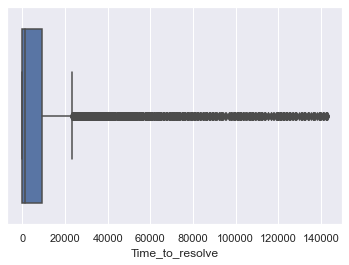

In [417]:
sns.boxplot(df_clsd_uq['Time_to_resolve'])

In [319]:
df_clsd_uq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19065 entries, 40 to 20766
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   19065 non-null  object        
 1   reassignment_count       19065 non-null  int64         
 2   reopen_count             19065 non-null  int64         
 3   sys_mod_count            19065 non-null  int64         
 4   made_sla                 19065 non-null  bool          
 5   caller_id                19065 non-null  object        
 6   opened_by                19065 non-null  object        
 7   opened_at                19065 non-null  datetime64[ns]
 8   contact_type             19065 non-null  object        
 9   location                 19065 non-null  object        
 10  category                 19065 non-null  object        
 11  subcategory              19065 non-null  object        
 12  u_symptom                19065 

In [320]:
df_clsd_uq.shape

(19065, 31)

In [321]:
df_clsd_uq.loc[:,['Time_to_resolve']]

,Time_to_resolve
40,384.0
90,40509.0
96,42013.0
104,5586.0
120,71934.0
...,...
20705,9.0
20716,14.0
20722,21.0
20741,13.0


In [418]:
df_clsd_uq.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
40,INC0011262,2,0,82,True,Caller 5281,Opened by 58,2016-03-24 17:33:00,Phone,Location 161,Category 46,Subcategory 248,Symptom 267,Group 57,Resolver 155,False,True,code 7,Resolved by 134,384.0,False,True,True,True,False,24,3,3,2,2,3
90,INC0019396,10,8,68,False,Caller 1580,Opened by 305,2016-04-14 20:42:00,Phone,Location 143,Category 53,Subcategory 114,Unknown,Group 70,Resolver 26,False,True,code 6,Resolved by 158,40509.0,False,False,False,True,True,14,4,3,2,2,3
96,INC0003419,3,4,67,False,Caller 448,Opened by 468,2016-03-07 11:58:00,Phone,Location 143,Category 46,Subcategory 150,Symptom 491,Group 10,Resolver 200,True,True,code 6,Resolved by 119,42013.0,True,True,True,True,True,7,3,0,2,2,3
104,INC0020383,0,0,66,False,Caller 3067,Opened by 500,2016-04-18 12:06:00,Phone,Location 54,Category 46,Subcategory 248,Symptom 267,Group 57,Resolver 155,False,True,code 8,Resolved by 139,5586.0,False,False,False,False,False,18,4,0,2,2,3
120,INC0011206,5,6,61,False,Caller 5393,Opened by 17,2016-03-24 16:01:00,Phone,Location 204,Category 19,Subcategory 174,Unknown,Group 70,Resolver 13,False,True,code 10,Resolved by 53,71934.0,True,False,True,True,True,24,3,3,2,2,3


In [322]:
y = df_clsd_uq.Time_to_resolve
X =  df_clsd_uq.drop('Time_to_resolve',axis=1)

In [323]:
y.shape

(19065,)

In [324]:
X.shape

(19065, 30)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
X_train.shape

(15252, 30)

In [558]:
X_train.shape

(15252, 30)

In [559]:
X_test.shape

(3813, 30)

In [560]:
X_train.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,INC0006383,0,0,2,False,Caller 1904,Opened by 180,2016-03-14 07:57:00,Phone,Location 125,Category 51,Subcategory 174,Symptom 491,Group 64,Resolver 94,False,False,code 6,Resolved by 85,False,False,False,False,False,14,3,0,2,2,3
8065,INC0014713,1,0,6,True,Caller 255,Opened by 501,2016-04-04 09:42:00,Phone,Location 204,Category 46,Subcategory 223,Unknown,Group 33,Resolver 216,False,True,code 6,Resolved by 197,False,False,False,True,False,4,4,0,2,2,3
1960,INC0027834,6,0,14,False,Caller 2199,Opened by 17,2016-05-10 10:48:00,Phone,Location 82,Category 28,Subcategory 174,Symptom 491,Group 70,Resolver 115,False,True,code 9,Resolved by 103,False,False,False,True,True,10,5,1,2,2,3
9045,INC0020601,1,0,5,True,Caller 5379,Opened by 17,2016-04-18 16:44:00,Phone,Location 108,Category 57,Subcategory 185,Symptom 491,Group 27,Resolver 34,False,True,code 6,Resolved by 33,False,False,False,True,False,18,4,0,2,2,3
13514,INC0017831,0,0,3,True,Caller 1237,Opened by 58,2016-04-11 17:32:00,Phone,Location 108,Category 20,Subcategory 174,Symptom 491,Group 70,Resolver 30,False,True,code 6,Resolved by 29,False,False,False,False,True,11,4,0,2,2,3


In [330]:
X_train.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,INC0006383,0,0,2,False,Caller 1904,Opened by 180,2016-03-14 07:57:00,Phone,Location 125,Category 51,Subcategory 174,Symptom 491,Group 64,Resolver 94,False,False,code 6,Resolved by 85,False,False,False,False,False,14,3,0,2,2,3
8065,INC0014713,1,0,6,True,Caller 255,Opened by 501,2016-04-04 09:42:00,Phone,Location 204,Category 46,Subcategory 223,Unknown,Group 33,Resolver 216,False,True,code 6,Resolved by 197,False,False,False,True,False,4,4,0,2,2,3
1960,INC0027834,6,0,14,False,Caller 2199,Opened by 17,2016-05-10 10:48:00,Phone,Location 82,Category 28,Subcategory 174,Symptom 491,Group 70,Resolver 115,False,True,code 9,Resolved by 103,False,False,False,True,True,10,5,1,2,2,3
9045,INC0020601,1,0,5,True,Caller 5379,Opened by 17,2016-04-18 16:44:00,Phone,Location 108,Category 57,Subcategory 185,Symptom 491,Group 27,Resolver 34,False,True,code 6,Resolved by 33,False,False,False,True,False,18,4,0,2,2,3
13514,INC0017831,0,0,3,True,Caller 1237,Opened by 58,2016-04-11 17:32:00,Phone,Location 108,Category 20,Subcategory 174,Symptom 491,Group 70,Resolver 30,False,True,code 6,Resolved by 29,False,False,False,False,True,11,4,0,2,2,3


In [332]:
y_train

17412        6.0
8065      2976.0
1960     10361.0
9045        41.0
13514       47.0
          ...   
11536      945.0
12217      275.0
5638     10013.0
1106     19002.0
16082       25.0
Name: Time_to_resolve, Length: 15252, dtype: float64

In [331]:
y_train.sort_values()

17710         1.0
15691         1.0
10583         1.0
13653         1.0
19622         1.0
           ...   
593      142520.0
302      142665.0
323      142768.0
234      142824.0
151      142836.0
Name: Time_to_resolve, Length: 15252, dtype: float64

In [340]:
X_test.shape

(3813, 30)

In [561]:
X_test.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17818,INC0021785,0,0,2,True,Caller 5184,Opened by 17,2016-04-22 08:40:00,Phone,Location 43,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,22,4,4,2,2,3
7605,INC0016468,3,0,6,True,Caller 13,Opened by 17,2016-04-07 10:57:00,Phone,Location 59,Category 42,Subcategory 223,Symptom 534,Unknown,Resolver 17,False,True,code 6,Resolved by 15,False,False,False,True,True,7,4,3,2,2,3
16471,INC0015465,0,0,2,True,Caller 74,Opened by 17,2016-04-05 12:01:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,5,4,1,2,2,3
3807,INC0018699,4,0,10,True,Caller 2132,Opened by 40,2016-04-13 13:57:00,Phone,Location 39,Category 57,Subcategory 174,Symptom 491,Group 23,Resolver 69,False,True,code 6,Resolved by 62,False,False,False,True,False,13,4,2,2,2,3
4306,INC0013420,0,0,9,False,Caller 1593,Opened by 17,2016-03-31 10:00:00,Phone,Location 204,Category 9,Subcategory 174,Symptom 491,Group 25,Resolver 125,False,True,code 5,Resolved by 113,False,False,False,False,False,31,3,3,2,2,3


In [562]:
y_test

17818        7.0
7605      1321.0
16471        4.0
3807      2721.0
4306     26244.0
          ...   
18568        3.0
15622        8.0
3726      3052.0
1157     28940.0
7517      4793.0
Name: Time_to_resolve, Length: 3813, dtype: float64

In [577]:
# Steps to export test data for to be used for prediction later

df_ir_pred = pd.read_csv(r"Project Files/incident_event_log_train.csv",parse_dates=[9,11,13,34,35],infer_datetime_format=True,dayfirst=True)
df_ir_pred['sys_created_at']= pd.to_datetime(df_ir_pred['sys_created_at'],errors ='coerce',dayfirst=True,infer_datetime_format=True)
df_ir_pred['resolved_at']= pd.to_datetime(df_ir_pred['resolved_at'],errors ='coerce',dayfirst=True,infer_datetime_format=True)

In [578]:
df_ir_pred.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00


In [579]:
X_test['number']

17818    INC0021785
7605     INC0016468
16471    INC0015465
3807     INC0018699
4306     INC0013420
            ...    
18568    INC0019716
15622    INC0028483
3726     INC0015461
1157     INC0009900
7517     INC0009020
Name: number, Length: 3813, dtype: object

In [586]:
df_ir_pred[df_ir_pred['number'].isin(X_test['number'])].nunique()

number                      3813
incident_state                 8
active                         2
reassignment_count            23
reopen_count                   5
sys_mod_count                 67
made_sla                       2
caller_id                   2216
opened_by                    113
opened_at                   3627
sys_created_by               102
sys_created_at              2206
sys_updated_by               289
sys_updated_at             14461
contact_type                   2
location                     123
category                      34
subcategory                  157
u_symptom                    272
cmdb_ci                       15
impact                         3
urgency                        3
priority                       4
assignment_group              67
assigned_to                  171
knowledge                      2
u_priority_confirmation        2
notify                         2
problem_id                    49
rfc                           27
vendor    

In [588]:
df_ir_pred[df_ir_pred['number'].isin(X_test['number'])].to_csv('Prediction_Exported_file.csv')

In [567]:
#X_test.to_csv('X_test_csv.csv')

In [589]:
#y_test.to_csv('y_test_csv.csv')

In [341]:
X_train_XG = X_train.drop(labels=['number','opened_at'],axis=1)

In [342]:
X_test_XG = X_test.drop(labels=['number','opened_at'],axis=1)

In [343]:
X_train_XG.shape

(15252, 28)

In [344]:
X_test_XG.shape

(3813, 28)

In [345]:
X_train_XG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15252 entries, 17412 to 16082
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   reassignment_count       15252 non-null  int64 
 1   reopen_count             15252 non-null  int64 
 2   sys_mod_count            15252 non-null  int64 
 3   made_sla                 15252 non-null  bool  
 4   caller_id                15252 non-null  object
 5   opened_by                15252 non-null  object
 6   contact_type             15252 non-null  object
 7   location                 15252 non-null  object
 8   category                 15252 non-null  object
 9   subcategory              15252 non-null  object
 10  u_symptom                15252 non-null  object
 11  assignment_group         15252 non-null  object
 12  assigned_to              15252 non-null  object
 13  knowledge                15252 non-null  bool  
 14  u_priority_confirmation  15252 non

In [346]:
# Below steps to implement Leave one out Encoding

In [347]:
for col in X_train_XG:
    print(col + '-' + str(X_train[col].value_counts().size))

reassignment_count-21
reopen_count-6
sys_mod_count-55
made_sla-2
caller_id-4327
opened_by-148
contact_type-2
location-192
category-38
subcategory-199
u_symptom-325
assignment_group-65
assigned_to-180
knowledge-2
u_priority_confirmation-2
closed_code-16
resolved_by-180
category_chngd-2
subcategory_chngd-2
u_symptom_chngd-2
assignment_group_chngd-2
assigned_to_chngd-2
opened_at_day-31
opened_at_month-4
opened_at_weekday-7
impact_new-3
urgency_new-3
priority_new-4


In [348]:
lis_X_train = X_train_XG.dtypes[X_train.dtypes == object].index.tolist()

In [349]:
lis_X_train

['caller_id',
 'opened_by',
 'contact_type',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'assignment_group',
 'assigned_to',
 'closed_code',
 'resolved_by']

In [350]:
X_train_XG['closed_code'].value_counts()

code 6     9262
code 7     2702
code 9     1287
code 8      484
code 5      444
code 1      314
code 10     200
code 11     154
code 16     106
code 4       83
Unknown      65
code 3       60
code 2       39
code 15      30
code 17      16
code 13       6
Name: closed_code, dtype: int64

In [351]:
# List of columns to be encoded using 
lis_X_train2 = []

for col in lis_X_train:
    if X_train_XG[col].value_counts().size > 15:
        lis_X_train2.append(col)
        print(str(col + ' -  ' + str(X_train_XG[col].value_counts().size)))

caller_id -  4327
opened_by -  148
location -  192
category -  38
subcategory -  199
u_symptom -  325
assignment_group -  65
assigned_to -  180
closed_code -  16
resolved_by -  180


In [352]:
lis_X_train2

['caller_id',
 'opened_by',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'assignment_group',
 'assigned_to',
 'closed_code',
 'resolved_by']

In [353]:
import category_encoders as ce

In [354]:
encoder = ce.LeaveOneOutEncoder(cols=lis_X_train2,random_state= 42,sigma = 0.05)

In [355]:
encoder

LeaveOneOutEncoder(cols=['caller_id', 'opened_by', 'location', 'category',
                         'subcategory', 'u_symptom', 'assignment_group',
                         'assigned_to', 'closed_code', 'resolved_by'],
                   random_state=42, sigma=0.05)

In [356]:
enc_fit = encoder.fit(X_train_XG,y_train)

In [357]:
X_train_tree1 = enc_fit.transform(X_train_XG,y_train)

In [358]:
#exporting the encoder
import pickle
output = open('encoder.pkl', 'wb')
pickle.dump(encoder, output)
output.close()

In [359]:
X_train_tree1

,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,0,0,2,False,647.343788,2059.824184,Phone,659.234722,2073.313531,6726.256164,6951.812645,1028.399560,286.862649,False,False,8115.460270,417.104745,False,False,False,False,False,14,3,0,2,2,3
8065,1,0,6,True,12643.153374,8695.799564,Phone,9616.766587,13538.462574,3409.940478,9722.418361,14485.214751,18965.923407,False,True,8501.306934,16762.416427,False,False,False,True,False,4,4,0,2,2,3
1960,6,0,14,False,10563.873648,7312.384405,Phone,9806.281898,6455.141621,6835.354357,7497.732704,3477.093799,8814.838473,False,True,5896.553279,8722.778721,False,False,False,True,True,10,5,1,2,2,3
9045,1,0,5,True,12750.242887,7445.216565,Phone,6887.058219,8236.404716,5175.200628,7507.056277,5986.087701,8407.151592,False,True,9030.169287,8427.159238,False,False,False,True,False,18,4,0,2,2,3
13514,0,0,3,True,3298.637433,6129.577765,Phone,7298.834011,3712.589892,6480.420064,7572.050063,3588.826588,74.400362,False,True,8612.127493,63.571407,False,False,False,False,True,11,4,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,1,0,4,True,29156.093411,9371.238497,Phone,6654.494174,14162.938148,39109.187419,9522.194090,38167.484634,50845.318484,False,True,8759.331807,57288.319137,False,True,False,True,True,23,3,2,2,2,3
12217,1,0,3,True,26592.127128,7430.185412,Phone,10597.490298,4328.215166,3922.251838,4873.459519,4639.589727,3011.227316,False,True,8524.801717,2983.507099,False,False,False,True,False,11,5,2,2,2,3
5638,3,0,8,False,6412.105213,8052.510939,Phone,12140.400509,4187.919707,3449.981389,546.512623,4399.956649,4006.023611,False,True,8823.061076,6118.927668,False,False,False,True,True,29,3,1,2,2,3
1106,8,0,19,False,7010.807370,7617.248742,Phone,5122.067635,8666.559607,8391.629959,8235.476933,11640.819713,11179.720849,True,True,8508.267533,11372.534610,False,False,True,True,True,10,3,3,2,2,3


In [360]:
X_train

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,INC0006383,0,0,2,False,Caller 1904,Opened by 180,2016-03-14 07:57:00,Phone,Location 125,Category 51,Subcategory 174,Symptom 491,Group 64,Resolver 94,False,False,code 6,Resolved by 85,False,False,False,False,False,14,3,0,2,2,3
8065,INC0014713,1,0,6,True,Caller 255,Opened by 501,2016-04-04 09:42:00,Phone,Location 204,Category 46,Subcategory 223,Unknown,Group 33,Resolver 216,False,True,code 6,Resolved by 197,False,False,False,True,False,4,4,0,2,2,3
1960,INC0027834,6,0,14,False,Caller 2199,Opened by 17,2016-05-10 10:48:00,Phone,Location 82,Category 28,Subcategory 174,Symptom 491,Group 70,Resolver 115,False,True,code 9,Resolved by 103,False,False,False,True,True,10,5,1,2,2,3
9045,INC0020601,1,0,5,True,Caller 5379,Opened by 17,2016-04-18 16:44:00,Phone,Location 108,Category 57,Subcategory 185,Symptom 491,Group 27,Resolver 34,False,True,code 6,Resolved by 33,False,False,False,True,False,18,4,0,2,2,3
13514,INC0017831,0,0,3,True,Caller 1237,Opened by 58,2016-04-11 17:32:00,Phone,Location 108,Category 20,Subcategory 174,Symptom 491,Group 70,Resolver 30,False,True,code 6,Resolved by 29,False,False,False,False,True,11,4,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,INC0010712,1,0,4,True,Caller 342,Opened by 193,2016-03-23 16:24:00,Phone,Location 108,Category 46,Subcategory 150,Unknown,Group 10,Resolver 139,False,True,code 6,Resolved by 125,False,True,False,True,True,23,3,2,2,2,3
12217,INC0028298,1,0,3,True,Caller 2481,Opened by 17,2016-05-11 10:20:00,Phone,Location 56,Category 42,Subcategory 223,Symptom 532,Group 39,Resolver 194,False,True,code 6,Resolved by 177,False,False,False,True,False,11,5,2,2,2,3
5638,INC0012714,3,0,8,False,Caller 1766,Opened by 17,2016-03-29 17:16:00,Phone,Location 34,Category 42,Subcategory 223,Symptom 534,Group 39,Resolver 183,False,True,code 6,Resolved by 166,False,False,False,True,True,29,3,1,2,2,3
1106,INC0005211,8,0,19,False,Caller 1522,Opened by 17,2016-03-10 09:12:00,Phone,Location 128,Category 57,Subcategory 146,Symptom 10,Group 58,Resolver 76,True,True,code 6,Resolved by 69,False,False,True,True,True,10,3,3,2,2,3


In [361]:
# Checking one of the values 

y_train

17412        6.0
8065      2976.0
1960     10361.0
9045        41.0
13514       47.0
          ...   
11536      945.0
12217      275.0
5638     10013.0
1106     19002.0
16082       25.0
Name: Time_to_resolve, Length: 15252, dtype: float64

In [362]:
list_op = df_clsd_uq[df_clsd_uq['opened_by'] == 'Opened by  501'].index

In [363]:
len(list_op)

535

In [364]:
y_train[y_train.index.isin(list_op)]

8065      2976.0
2820      9949.0
2758      2930.0
16083      221.0
11972       32.0
          ...   
8299     13140.0
3116      2956.0
6007      1741.0
11786    10208.0
1513      5968.0
Name: Time_to_resolve, Length: 424, dtype: float64

In [365]:
y_train[y_train.index.isin(list_op)].size

424

In [366]:
(y_train[y_train.index.isin(list_op)].sum() - 2976)/424

8552.436320754718

In [367]:
# The value is 8695.799564 because of the sigma value of 0.05 which is the introduction of noise into the calculation

In [368]:
X_train_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,0,0,2,False,647.343788,2059.824184,Phone,659.234722,2073.313531,6726.256164,6951.812645,1028.399560,286.862649,False,False,8115.460270,417.104745,False,False,False,False,False,14,3,0,2,2,3
8065,1,0,6,True,12643.153374,8695.799564,Phone,9616.766587,13538.462574,3409.940478,9722.418361,14485.214751,18965.923407,False,True,8501.306934,16762.416427,False,False,False,True,False,4,4,0,2,2,3
1960,6,0,14,False,10563.873648,7312.384405,Phone,9806.281898,6455.141621,6835.354357,7497.732704,3477.093799,8814.838473,False,True,5896.553279,8722.778721,False,False,False,True,True,10,5,1,2,2,3
9045,1,0,5,True,12750.242887,7445.216565,Phone,6887.058219,8236.404716,5175.200628,7507.056277,5986.087701,8407.151592,False,True,9030.169287,8427.159238,False,False,False,True,False,18,4,0,2,2,3
13514,0,0,3,True,3298.637433,6129.577765,Phone,7298.834011,3712.589892,6480.420064,7572.050063,3588.826588,74.400362,False,True,8612.127493,63.571407,False,False,False,False,True,11,4,0,2,2,3


In [369]:
# Converting bool,object data type columns, opened_at_day,opened_at_month,opened_at_weekday into numerical using one hot encoding

Con_oh = ['made_sla','contact_type','knowledge','u_priority_confirmation','category_chngd','subcategory_chngd','u_symptom_chngd','assignment_group_chngd','assigned_to_chngd','opened_at_day','opened_at_month','opened_at_weekday']

X_train_tree1 = pd.get_dummies(X_train_tree1, columns = Con_oh)

In [370]:
X_train_tree1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15252 entries, 17412 to 16082
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reassignment_count             15252 non-null  int64  
 1   reopen_count                   15252 non-null  int64  
 2   sys_mod_count                  15252 non-null  int64  
 3   caller_id                      15252 non-null  float64
 4   opened_by                      15252 non-null  float64
 5   location                       15252 non-null  float64
 6   category                       15252 non-null  float64
 7   subcategory                    15252 non-null  float64
 8   u_symptom                      15252 non-null  float64
 9   assignment_group               15252 non-null  float64
 10  assigned_to                    15252 non-null  float64
 11  closed_code                    15252 non-null  float64
 12  resolved_by                    15252 non-n

In [371]:
X_train_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by,impact_new,urgency_new,priority_new,made_sla_False,made_sla_True,...,opened_at_day_25,opened_at_day_26,opened_at_day_27,opened_at_day_28,opened_at_day_29,opened_at_day_30,opened_at_day_31,opened_at_month_2,opened_at_month_3,opened_at_month_4,opened_at_month_5,opened_at_weekday_0,opened_at_weekday_1,opened_at_weekday_2,opened_at_weekday_3,opened_at_weekday_4,opened_at_weekday_5,opened_at_weekday_6
17412,0,0,2,647.343788,2059.824184,659.234722,2073.313531,6726.256164,6951.812645,1028.399560,286.862649,8115.460270,417.104745,2,2,3,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8065,1,0,6,12643.153374,8695.799564,9616.766587,13538.462574,3409.940478,9722.418361,14485.214751,18965.923407,8501.306934,16762.416427,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1960,6,0,14,10563.873648,7312.384405,9806.281898,6455.141621,6835.354357,7497.732704,3477.093799,8814.838473,5896.553279,8722.778721,2,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9045,1,0,5,12750.242887,7445.216565,6887.058219,8236.404716,5175.200628,7507.056277,5986.087701,8407.151592,9030.169287,8427.159238,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
13514,0,0,3,3298.637433,6129.577765,7298.834011,3712.589892,6480.420064,7572.050063,3588.826588,74.400362,8612.127493,63.571407,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [372]:
pkl_file = open('encoder.pkl', 'rb')
le_enc = pickle.load(pkl_file) 
pkl_file.close()
#df_test['Departure'] = le_departure.transform(df_test['Departure'])

In [373]:
X_test_tree1 = le_enc.transform(X_test_XG)

In [374]:
X_test_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17818,0,0,2,True,3962.333333,7541.868213,Phone,5000.294416,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,False,True,8594.160441,2580.137028,False,False,False,False,False,22,4,4,2,2,3
7605,3,0,6,True,33123.400000,7541.868213,Phone,10502.906250,4193.976720,3688.217916,600.256563,6422.258414,6683.441489,False,True,8594.160441,6735.740139,False,False,False,True,True,7,4,3,2,2,3
16471,0,0,2,True,12316.666667,7541.868213,Phone,9770.271408,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,False,True,8594.160441,2580.137028,False,False,False,False,False,5,4,1,2,2,3
3807,4,0,10,True,16885.666667,8418.508961,Phone,5759.730769,8045.342059,6718.585080,7545.847184,10720.604096,18977.206522,False,True,8594.160441,17687.489933,False,False,False,True,False,13,4,2,2,2,3
4306,0,0,9,False,4083.636364,7541.868213,Phone,9770.271408,8880.046414,6718.585080,7545.847184,11232.190703,12263.795455,False,True,9775.117117,11574.000000,False,False,False,False,False,31,3,3,2,2,3


In [375]:
X_test_tree1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 17818 to 7517
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   reassignment_count       3813 non-null   int64  
 1   reopen_count             3813 non-null   int64  
 2   sys_mod_count            3813 non-null   int64  
 3   made_sla                 3813 non-null   bool   
 4   caller_id                3813 non-null   float64
 5   opened_by                3813 non-null   float64
 6   contact_type             3813 non-null   object 
 7   location                 3813 non-null   float64
 8   category                 3813 non-null   float64
 9   subcategory              3813 non-null   float64
 10  u_symptom                3813 non-null   float64
 11  assignment_group         3813 non-null   float64
 12  assigned_to              3813 non-null   float64
 13  knowledge                3813 non-null   bool   
 14  u_priority_confirmat

In [376]:
X_test_tree1['contact_type'].value_counts()

Phone    3805
Email       8
Name: contact_type, dtype: int64

In [377]:
X_test_tree1 = pd.get_dummies(X_test_tree1, columns = Con_oh)

In [378]:
X_test.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17818,INC0021785,0,0,2,True,Caller 5184,Opened by 17,2016-04-22 08:40:00,Phone,Location 43,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,22,4,4,2,2,3
7605,INC0016468,3,0,6,True,Caller 13,Opened by 17,2016-04-07 10:57:00,Phone,Location 59,Category 42,Subcategory 223,Symptom 534,Unknown,Resolver 17,False,True,code 6,Resolved by 15,False,False,False,True,True,7,4,3,2,2,3
16471,INC0015465,0,0,2,True,Caller 74,Opened by 17,2016-04-05 12:01:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,5,4,1,2,2,3
3807,INC0018699,4,0,10,True,Caller 2132,Opened by 40,2016-04-13 13:57:00,Phone,Location 39,Category 57,Subcategory 174,Symptom 491,Group 23,Resolver 69,False,True,code 6,Resolved by 62,False,False,False,True,False,13,4,2,2,2,3
4306,INC0013420,0,0,9,False,Caller 1593,Opened by 17,2016-03-31 10:00:00,Phone,Location 204,Category 9,Subcategory 174,Symptom 491,Group 25,Resolver 125,False,True,code 5,Resolved by 113,False,False,False,False,False,31,3,3,2,2,3


In [379]:
X_test_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by,impact_new,urgency_new,priority_new,made_sla_False,made_sla_True,...,opened_at_day_25,opened_at_day_26,opened_at_day_27,opened_at_day_28,opened_at_day_29,opened_at_day_30,opened_at_day_31,opened_at_month_2,opened_at_month_3,opened_at_month_4,opened_at_month_5,opened_at_weekday_0,opened_at_weekday_1,opened_at_weekday_2,opened_at_weekday_3,opened_at_weekday_4,opened_at_weekday_5,opened_at_weekday_6
17818,0,0,2,3962.333333,7541.868213,5000.294416,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,8594.160441,2580.137028,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7605,3,0,6,33123.400000,7541.868213,10502.906250,4193.976720,3688.217916,600.256563,6422.258414,6683.441489,8594.160441,6735.740139,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
16471,0,0,2,12316.666667,7541.868213,9770.271408,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,8594.160441,2580.137028,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3807,4,0,10,16885.666667,8418.508961,5759.730769,8045.342059,6718.585080,7545.847184,10720.604096,18977.206522,8594.160441,17687.489933,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4306,0,0,9,4083.636364,7541.868213,9770.271408,8880.046414,6718.585080,7545.847184,11232.190703,12263.795455,9775.117117,11574.000000,2,2,3,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [380]:
X_test_tree1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 17818 to 7517
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reassignment_count             3813 non-null   int64  
 1   reopen_count                   3813 non-null   int64  
 2   sys_mod_count                  3813 non-null   int64  
 3   caller_id                      3813 non-null   float64
 4   opened_by                      3813 non-null   float64
 5   location                       3813 non-null   float64
 6   category                       3813 non-null   float64
 7   subcategory                    3813 non-null   float64
 8   u_symptom                      3813 non-null   float64
 9   assignment_group               3813 non-null   float64
 10  assigned_to                    3813 non-null   float64
 11  closed_code                    3813 non-null   float64
 12  resolved_by                    3813 non-null

In [381]:
# XGBoost Implementation

import xgboost as xgb
from xgboost import XGBRegressor

In [382]:
X_train_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by,impact_new,urgency_new,priority_new,made_sla_False,made_sla_True,...,opened_at_day_25,opened_at_day_26,opened_at_day_27,opened_at_day_28,opened_at_day_29,opened_at_day_30,opened_at_day_31,opened_at_month_2,opened_at_month_3,opened_at_month_4,opened_at_month_5,opened_at_weekday_0,opened_at_weekday_1,opened_at_weekday_2,opened_at_weekday_3,opened_at_weekday_4,opened_at_weekday_5,opened_at_weekday_6
17412,0,0,2,647.343788,2059.824184,659.234722,2073.313531,6726.256164,6951.812645,1028.399560,286.862649,8115.460270,417.104745,2,2,3,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8065,1,0,6,12643.153374,8695.799564,9616.766587,13538.462574,3409.940478,9722.418361,14485.214751,18965.923407,8501.306934,16762.416427,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1960,6,0,14,10563.873648,7312.384405,9806.281898,6455.141621,6835.354357,7497.732704,3477.093799,8814.838473,5896.553279,8722.778721,2,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9045,1,0,5,12750.242887,7445.216565,6887.058219,8236.404716,5175.200628,7507.056277,5986.087701,8407.151592,9030.169287,8427.159238,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
13514,0,0,3,3298.637433,6129.577765,7298.834011,3712.589892,6480.420064,7572.050063,3588.826588,74.400362,8612.127493,63.571407,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [383]:
X_test_tree1.head()

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by,impact_new,urgency_new,priority_new,made_sla_False,made_sla_True,...,opened_at_day_25,opened_at_day_26,opened_at_day_27,opened_at_day_28,opened_at_day_29,opened_at_day_30,opened_at_day_31,opened_at_month_2,opened_at_month_3,opened_at_month_4,opened_at_month_5,opened_at_weekday_0,opened_at_weekday_1,opened_at_weekday_2,opened_at_weekday_3,opened_at_weekday_4,opened_at_weekday_5,opened_at_weekday_6
17818,0,0,2,3962.333333,7541.868213,5000.294416,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,8594.160441,2580.137028,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7605,3,0,6,33123.400000,7541.868213,10502.906250,4193.976720,3688.217916,600.256563,6422.258414,6683.441489,8594.160441,6735.740139,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
16471,0,0,2,12316.666667,7541.868213,9770.271408,4193.976720,3688.217916,600.256563,3335.304696,2593.714551,8594.160441,2580.137028,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3807,4,0,10,16885.666667,8418.508961,5759.730769,8045.342059,6718.585080,7545.847184,10720.604096,18977.206522,8594.160441,17687.489933,2,2,3,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4306,0,0,9,4083.636364,7541.868213,9770.271408,8880.046414,6718.585080,7545.847184,11232.190703,12263.795455,9775.117117,11574.000000,2,2,3,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [384]:
xgbr = XGBRegressor(n_jobs= -1, random_state= 42, verbosity= 3)

In [385]:
xgbr

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=3)

In [386]:
xgbr.fit(X_train_tree1,y_train)

[21:55:01] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[21:55:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:55:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[21:55:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:55:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:55:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[21:55:01] INFO: C:\Us

[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:55:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 112 extra nodes, 0 prune

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=3)

In [387]:
y_pred_xgb = xgbr.predict(X_test_tree1)

In [388]:
print('The rmse of XGB prediction is:', mean_squared_error(y_test, y_pred_xgb) ** 0.5)

The rmse of XGB prediction is: 6486.623069445981


# The rmse of XGB prediction is: 6486.623069445981

In [696]:
#Hyperparamter tunning 1:

#param_grid = {
#              'learning_rate' : [0.01,0.1,0.3],
#              'max_depth' : [4, 6],
#              'n_estimators' : [100,200,500]
#             }

In [389]:
param_grid = {
              'learning_rate' : [0.1,1],
              'max_depth' : [6],
              'n_estimators' : [200,300]
             }

In [390]:
gridsearch = GridSearchCV(xgbr,param_grid,n_jobs = -1,verbose = 3)

In [392]:
gridsearch.fit(X_train_tree1,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min finished


[21:58:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:58:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[21:58:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[21:58:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:58:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[21:58:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 

[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[21:58:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 prune

[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[21:58:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pr

[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:58:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned

[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[21:58:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 prune

[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[21:58:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 prun

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=3),
             n_jobs=-1,
  

In [393]:
gridsearch.best_score_

0.8863071092660177

In [394]:
gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}

In [395]:
xgbr_gcv = XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators = 300,n_jobs= -1, random_state= 42, verbosity= 3)

In [396]:
xgbr_gcv.fit(X_train_tree1,y_train)

[21:59:39] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[21:59:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:59:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[21:59:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[21:59:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:59:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[21:59:40] INFO: C:\Us

[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:59:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 prun

[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[21:59:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 prune

[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:59:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 prune

[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[21:59:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pru

[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[21:59:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pru

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=3)

In [397]:
y_pred_xgb_cv = xgbr_gcv.predict(X_test_tree1)

In [398]:
print('The rmse of XGB prediction is:', mean_squared_error(y_test, y_pred_xgb_cv) ** 0.5)

The rmse of XGB prediction is: 6465.772688142109


# The rmse of XGB prediction is: 6465.772688142109

In [399]:
y_pred_xgb_cv

array([ 1.0830972e+00,  1.9357548e+03, -3.4100049e+00, ...,
        4.6512773e+03,  2.3224799e+04,  4.4267515e+03], dtype=float32)

In [400]:
y_test

17818        7.0
7605      1321.0
16471        4.0
3807      2721.0
4306     26244.0
          ...   
18568        3.0
15622        8.0
3726      3052.0
1157     28940.0
7517      4793.0
Name: Time_to_resolve, Length: 3813, dtype: float64

In [401]:
y_test_lst = list(y_test)

In [402]:
y_test_lst

[7.0,
 1321.0,
 4.0,
 2721.0,
 26244.0,
 3.0,
 1.0,
 5648.0,
 116817.0,
 31501.0,
 476.0,
 29366.0,
 25488.0,
 11328.0,
 24.0,
 5.0,
 427.0,
 28653.0,
 26.0,
 57441.0,
 13.0,
 6941.0,
 22.0,
 20.0,
 16592.0,
 1645.0,
 2943.0,
 72.0,
 5.0,
 25654.0,
 19969.0,
 119958.0,
 637.0,
 7.0,
 302.0,
 70.0,
 69.0,
 1733.0,
 38404.0,
 38704.0,
 20.0,
 9818.0,
 3.0,
 5966.0,
 3340.0,
 16.0,
 1603.0,
 1148.0,
 4145.0,
 19777.0,
 24.0,
 2.0,
 9770.0,
 88.0,
 15.0,
 7661.0,
 1783.0,
 10.0,
 9647.0,
 23226.0,
 70.0,
 1578.0,
 912.0,
 1191.0,
 187.0,
 3857.0,
 26.0,
 459.0,
 23147.0,
 50710.0,
 8677.0,
 18872.0,
 20.0,
 7243.0,
 1101.0,
 2.0,
 17.0,
 28370.0,
 9.0,
 21.0,
 1402.0,
 8767.0,
 8870.0,
 1537.0,
 8.0,
 48974.0,
 9932.0,
 15830.0,
 20.0,
 19.0,
 4672.0,
 2.0,
 21828.0,
 28.0,
 21642.0,
 5952.0,
 7.0,
 2.0,
 25.0,
 19825.0,
 5.0,
 4689.0,
 1.0,
 1734.0,
 4218.0,
 22767.0,
 1889.0,
 2879.0,
 86068.0,
 307.0,
 14144.0,
 20211.0,
 41.0,
 1505.0,
 26105.0,
 240.0,
 4564.0,
 4356.0,
 30.0,
 9.0,
 

In [403]:
X_train.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17412,INC0006383,0,0,2,False,Caller 1904,Opened by 180,2016-03-14 07:57:00,Phone,Location 125,Category 51,Subcategory 174,Symptom 491,Group 64,Resolver 94,False,False,code 6,Resolved by 85,False,False,False,False,False,14,3,0,2,2,3
8065,INC0014713,1,0,6,True,Caller 255,Opened by 501,2016-04-04 09:42:00,Phone,Location 204,Category 46,Subcategory 223,Unknown,Group 33,Resolver 216,False,True,code 6,Resolved by 197,False,False,False,True,False,4,4,0,2,2,3
1960,INC0027834,6,0,14,False,Caller 2199,Opened by 17,2016-05-10 10:48:00,Phone,Location 82,Category 28,Subcategory 174,Symptom 491,Group 70,Resolver 115,False,True,code 9,Resolved by 103,False,False,False,True,True,10,5,1,2,2,3
9045,INC0020601,1,0,5,True,Caller 5379,Opened by 17,2016-04-18 16:44:00,Phone,Location 108,Category 57,Subcategory 185,Symptom 491,Group 27,Resolver 34,False,True,code 6,Resolved by 33,False,False,False,True,False,18,4,0,2,2,3
13514,INC0017831,0,0,3,True,Caller 1237,Opened by 58,2016-04-11 17:32:00,Phone,Location 108,Category 20,Subcategory 174,Symptom 491,Group 70,Resolver 30,False,True,code 6,Resolved by 29,False,False,False,False,True,11,4,0,2,2,3


In [404]:
X_test.head()

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17818,INC0021785,0,0,2,True,Caller 5184,Opened by 17,2016-04-22 08:40:00,Phone,Location 43,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,22,4,4,2,2,3
7605,INC0016468,3,0,6,True,Caller 13,Opened by 17,2016-04-07 10:57:00,Phone,Location 59,Category 42,Subcategory 223,Symptom 534,Unknown,Resolver 17,False,True,code 6,Resolved by 15,False,False,False,True,True,7,4,3,2,2,3
16471,INC0015465,0,0,2,True,Caller 74,Opened by 17,2016-04-05 12:01:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,5,4,1,2,2,3
3807,INC0018699,4,0,10,True,Caller 2132,Opened by 40,2016-04-13 13:57:00,Phone,Location 39,Category 57,Subcategory 174,Symptom 491,Group 23,Resolver 69,False,True,code 6,Resolved by 62,False,False,False,True,False,13,4,2,2,2,3
4306,INC0013420,0,0,9,False,Caller 1593,Opened by 17,2016-03-31 10:00:00,Phone,Location 204,Category 9,Subcategory 174,Symptom 491,Group 25,Resolver 125,False,True,code 5,Resolved by 113,False,False,False,False,False,31,3,3,2,2,3


In [405]:
inc_nums = list(X_test['number'])
opend_at_dt = list(X_test['opened_at'])

In [406]:
#X_test[X_test.index == 11001]

In [407]:
result = pd.DataFrame(list(zip(inc_nums,opend_at_dt,y_pred_xgb_cv,y_test_lst)),columns=['number','opened_at','Prediction','Actual'])

In [466]:
df_clsd_uq[df_clsd_uq['number']=='INC0015741']

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,Time_to_resolve,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
1966,INC0015741,6,0,14,True,Caller 291,Opened by 131,2016-04-06 08:13:00,Phone,Location 165,Category 13,Subcategory 302,Symptom 8,Unknown,Resolver 17,False,True,code 7,Resolved by 15,3017.0,False,False,False,True,False,6,4,2,2,2,3


In [409]:
result.sort_values('Prediction')[0:50]

,number,opened_at,Prediction,Actual
3147,INC0015741,2016-04-06 08:13:00,-3285.517578,3017.0
106,INC0002890,2016-03-06 03:39:00,-2326.461182,1889.0
323,INC0013398,2016-03-31 09:37:00,-2193.390381,1.0
2330,INC0007347,2016-03-15 14:32:00,-1580.173096,2528.0
244,INC0015812,2016-04-06 09:28:00,-1261.458130,43.0
325,INC0012837,2016-03-30 08:37:00,-1256.691406,509.0
2751,INC0015740,2016-04-06 08:11:00,-1218.676147,1812.0
3519,INC0008663,2016-03-18 10:16:00,-1213.586426,96.0
1319,INC0021706,2016-04-21 04:07:00,-1160.194824,39.0
2157,INC0006654,2016-03-14 11:51:00,-1139.707275,47.0


In [412]:
result.sort_values('Prediction')[500:550]

,number,opened_at,Prediction,Actual
2882,INC0012031,2016-03-28 14:14:00,73.640305,9.0
2898,INC0018851,2016-04-13 16:48:00,74.066116,29.0
1638,INC0012799,2016-03-30 07:58:00,74.151054,15.0
2344,INC0026579,2016-05-05 18:20:00,74.871483,7.0
3610,INC0023128,2016-04-27 10:57:00,74.969154,22.0
3651,INC0027382,2016-05-09 10:30:00,76.478119,10.0
2489,INC0025116,2016-05-02 17:52:00,77.062744,6.0
333,INC0017098,2016-04-08 15:32:00,77.647202,6.0
1551,INC0014857,2016-04-04 12:15:00,78.337776,27.0
2626,INC0024131,2016-04-29 11:29:00,79.176224,1.0


In [413]:
result.sort_values('Prediction')

,number,opened_at,Prediction,Actual
3147,INC0015741,2016-04-06 08:13:00,-3285.517578,3017.0
106,INC0002890,2016-03-06 03:39:00,-2326.461182,1889.0
323,INC0013398,2016-03-31 09:37:00,-2193.390381,1.0
2330,INC0007347,2016-03-15 14:32:00,-1580.173096,2528.0
244,INC0015812,2016-04-06 09:28:00,-1261.458130,43.0
...,...,...,...,...
2384,INC0010681,2016-03-23 15:48:00,126188.062500,123924.0
8,INC0016783,2016-04-08 08:31:00,126669.906250,116817.0
1863,INC0003529,2016-03-07 13:31:00,132787.328125,123656.0
3620,INC0015300,2016-04-05 09:19:00,132916.671875,124131.0


In [453]:
# Within 6 hours prediction (1025 records of 3813 records)

result[result['Prediction'] < 360]

,number,opened_at,Prediction,Actual
0,INC0021785,2016-04-22 08:40:00,1.083097,7.0
2,INC0015465,2016-04-05 12:01:00,-3.410005,4.0
6,INC0006852,2016-03-14 15:40:00,114.444527,1.0
15,INC0023266,2016-04-27 14:49:00,-61.313705,5.0
18,INC0007088,2016-03-15 09:27:00,-172.263733,26.0
...,...,...,...,...
3797,INC0009866,2016-03-22 10:03:00,209.195526,11.0
3802,INC0012529,2016-03-29 12:32:00,18.259220,133.0
3806,INC0024195,2016-04-29 12:55:00,157.495270,5.0
3808,INC0019716,2016-04-15 12:46:00,-26.295771,3.0


In [454]:
# Within 6 hours prediction - Sorted by Top 50 actual time to resolve

result[result['Prediction'] < 360].sort_values('Actual', ascending = False)[0:50]

,number,opened_at,Prediction,Actual
3585,INC0023851,2016-04-28 16:12:00,-111.478851,8370.0
2904,INC0023782,2016-04-28 14:22:00,191.594620,7453.0
3113,INC0003557,2016-03-07 13:47:00,251.688065,5887.0
1479,INC0008404,2016-03-17 15:13:00,353.705475,5804.0
2205,INC0022814,2016-04-26 14:27:00,200.775513,4404.0
2899,INC0026919,2016-05-06 14:31:00,-65.216232,4288.0
1177,INC0010268,2016-03-23 07:14:00,265.122711,4279.0
1425,INC0014155,2016-04-01 14:27:00,-646.744995,4143.0
194,INC0012398,2016-03-29 10:08:00,253.968765,3496.0
3147,INC0015741,2016-04-06 08:13:00,-3285.517578,3017.0


In [455]:
# Within 3 hours prediction and within 6 hours actual (1025 records of 3813 records)

result[(result['Prediction'] < 180) & (result['Actual'] < 360)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
2224,INC0017421,2016-04-11 09:09:00,129.789734,350.0
849,INC0007128,2016-03-15 10:08:00,124.441101,328.0
1791,INC0021384,2016-04-20 14:23:00,156.279480,321.0
3191,INC0009413,2016-03-21 11:32:00,96.055183,311.0
2036,INC0007183,2016-03-15 11:00:00,108.147346,311.0
...,...,...,...,...
2251,INC0029041,2016-05-12 22:12:00,37.821247,1.0
574,INC0026091,2016-05-04 22:51:00,112.740677,1.0
1238,INC0018405,2016-04-13 04:35:00,-33.778229,1.0
1913,INC0015929,2016-04-06 11:50:00,-78.287613,1.0


In [464]:
# Within 6 hours prediction and within 12 hours actual (1025 records of 3813 records)

result[((result['Prediction'] > 180) & (result['Prediction'] < 1440)) & ((result['Actual'] > 360) & (result['Actual'] < 1440))].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
3613,INC0010372,2016-03-23 09:55:00,868.866577,1439.0
2280,INC0019174,2016-04-14 12:33:00,1181.020386,1433.0
989,INC0013228,2016-03-30 16:48:00,1043.431763,1428.0
3558,INC0027214,2016-05-08 15:41:00,1330.077881,1427.0
969,INC0016641,2016-04-07 15:31:00,1116.177979,1413.0
...,...,...,...,...
1506,INC0019496,2016-04-15 09:15:00,434.388733,373.0
3258,INC0003826,2016-03-07 19:27:00,765.308289,372.0
3161,INC0012807,2016-03-30 08:06:00,756.373352,368.0
2843,INC0012896,2016-03-30 09:35:00,350.869476,365.0


In [465]:
# Within 6 hours prediction and within 12 hours actual (1025 records of 3813 records)

result[((result['Prediction'] > 180) & (result['Prediction'] < 1440)) & (result['Actual'] > 1440)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
2904,INC0023782,2016-04-28 14:22:00,191.594620,7453.0
3383,INC0016354,2016-04-07 09:06:00,924.042664,7206.0
1994,INC0023837,2016-04-28 15:44:00,1006.943359,6968.0
203,INC0013757,2016-04-01 00:19:00,1008.520569,5942.0
3113,INC0003557,2016-03-07 13:47:00,251.688065,5887.0
...,...,...,...,...
3547,INC0020226,2016-04-18 09:29:00,1115.635742,1477.0
1516,INC0001049,2016-03-02 09:27:00,1177.758179,1467.0
2343,INC0024713,2016-05-02 09:14:00,1419.677734,1462.0
1393,INC0001943,2016-03-03 14:05:00,1188.973145,1450.0


In [440]:
# Records with prediction above 0 minutes

result[(result['Prediction'] > 0) & (result['Prediction'] < 360)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
1005,INC0013055,2016-03-30 13:32:00,0.015443,8.0
1893,INC0022960,2016-04-26 20:19:00,0.205744,6.0
302,INC0020248,2016-04-18 09:47:00,0.333028,20.0
2825,INC0020724,2016-04-19 08:31:00,0.396626,105.0
1307,INC0022428,2016-04-25 15:03:00,0.434795,3.0
...,...,...,...,...
356,INC0017677,2016-04-11 13:44:00,356.783783,29.0
866,INC0016076,2016-04-06 15:10:00,359.102173,196.0
3649,INC0027264,2016-05-09 08:22:00,359.362823,27.0
484,INC0029072,2016-05-13 07:57:00,359.389221,16.0


In [438]:
# Within 24 hours (701 records of 3813 records)

result[(result['Prediction'] > 360) & (result['Prediction'] < 1440)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
14,INC0020228,2016-04-18 09:32:00,362.271606,24.0
1636,INC0014275,2016-04-01 16:48:00,363.777527,4.0
2154,INC0013367,2016-03-31 09:00:00,364.270874,271.0
2286,INC0015376,2016-04-05 10:24:00,366.486633,10.0
334,INC0027838,2016-05-10 10:54:00,367.359772,332.0
...,...,...,...,...
445,INC0023134,2016-04-27 11:11:00,1431.742554,1690.0
2622,INC0028327,2016-05-11 10:49:00,1433.530762,314.0
3412,INC0009676,2016-03-21 17:03:00,1433.983521,3821.0
25,INC0008336,2016-03-17 13:39:00,1435.066284,1645.0


In [441]:
# 24 - 48 hours hours (526 records of 3813 records)

result[(result['Prediction'] > 1440) & (result['Prediction'] < 2880)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
2918,INC0006693,2016-03-14 12:53:00,1440.715698,139.0
806,INC0017926,2016-04-12 08:57:00,1440.807373,106.0
2680,INC0008957,2016-03-18 17:30:00,1443.026978,1268.0
1299,INC0027732,2016-05-10 08:42:00,1445.896851,1763.0
522,INC0007548,2016-03-16 08:44:00,1446.172852,3028.0
...,...,...,...,...
941,INC0018382,2016-04-12 20:04:00,2863.437500,2201.0
1580,INC0020968,2016-04-19 14:29:00,2863.695557,1197.0
1477,INC0013843,2016-04-01 08:49:00,2875.565674,130.0
3086,INC0017551,2016-04-11 11:08:00,2875.634521,1718.0


In [446]:
# 2 to 7 days (549 records of 3813 records)

result[(result['Prediction'] > 2880) & (result['Prediction'] < 10080)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
3022,INC0003199,2016-03-07 09:52:00,2885.036133,2862.0
2725,INC0024306,2016-04-29 15:45:00,2888.681641,4223.0
1111,INC0013631,2016-03-31 15:29:00,2889.387939,44.0
1852,INC0023522,2016-04-28 08:56:00,2902.867432,1596.0
2958,INC0028205,2016-05-11 08:52:00,2907.794922,1610.0
...,...,...,...,...
2476,INC0001968,2016-03-03 14:30:00,10034.750977,5601.0
1669,INC0012152,2016-03-28 16:21:00,10055.935547,9626.0
367,INC0012074,2016-03-28 14:50:00,10061.833008,11349.0
3768,INC0002439,2016-03-04 11:34:00,10065.064453,256.0


In [467]:
# 1 - 2 weeks (603 records of 3813 records)

result[(result['Prediction'] > 10080) & (result['Prediction'] < 20160)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
824,INC0001217,2016-03-02 11:39:00,10087.667969,7035.0
589,INC0023759,2016-04-28 13:56:00,10109.007812,5863.0
850,INC0026710,2016-05-06 09:19:00,10146.506836,4584.0
736,INC0012713,2016-03-29 17:15:00,10150.413086,11353.0
731,INC0021645,2016-04-20 17:37:00,10152.884766,7009.0
...,...,...,...,...
3311,INC0007959,2016-03-16 16:54:00,19999.437500,21620.0
713,INC0023560,2016-04-28 09:26:00,20013.220703,26295.0
2908,INC0013878,2016-04-01 09:11:00,20067.750000,10509.0
2012,INC0007415,2016-03-15 16:19:00,20076.103516,19865.0


In [470]:
# 2 weeks - 1 month (264 records of 3813 records)

result[(result['Prediction'] > 20160) & (result['Prediction'] < 43200)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
2135,INC0019973,2016-04-15 17:11:00,20173.632812,26968.0
1711,INC0014996,2016-04-04 15:11:00,20189.484375,21864.0
253,INC0009681,2016-03-21 17:11:00,20207.544922,19496.0
1176,INC0014916,2016-04-04 13:43:00,20250.146484,10460.0
3559,INC0013447,2016-03-31 10:45:00,20251.937500,10018.0
...,...,...,...,...
614,INC0001906,2016-03-03 13:07:00,42295.023438,11184.0
1889,INC0019326,2016-04-14 16:18:00,42432.320312,19876.0
2533,INC0013236,2016-03-30 16:55:00,42863.558594,38937.0
3243,INC0028735,2016-05-12 10:16:00,42903.300781,49221.0


In [471]:
# 1 - 2 months (104 records of 3813 records)

result[(result['Prediction'] > 43200) & (result['Prediction'] < 86400)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
999,INC0002143,2016-03-03 17:33:00,43544.535156,35517.0
2648,INC0004803,2016-03-09 11:18:00,43570.144531,47723.0
2469,INC0027897,2016-05-10 12:37:00,43864.160156,61786.0
2418,INC0024956,2016-05-02 13:54:00,43919.917969,25709.0
485,INC0020275,2016-04-18 10:06:00,44471.207031,51806.0
...,...,...,...,...
108,INC0000346,2016-02-29 15:17:00,84031.757812,86068.0
702,INC0017973,2016-04-12 09:39:00,84473.695312,93722.0
2686,INC0029074,2016-05-13 07:59:00,85603.742188,98527.0
2052,INC0027621,2016-05-09 16:36:00,85927.125000,84536.0


In [478]:
# 2 - 3 months (41 records of 3813 records)

result[(result['Prediction'] > 86400) & (result['Prediction'] < 144000)].sort_values('Prediction')

,number,opened_at,Prediction,Actual
3595,INC0005623,2016-03-10 17:47:00,90143.976562,100724.0
615,INC0010730,2016-03-23 16:59:00,91258.523438,102278.0
474,INC0001501,2016-03-02 16:44:00,92526.351562,101699.0
1237,INC0004401,2016-03-08 15:37:00,93566.859375,93233.0
3541,INC0002366,2016-03-04 10:22:00,93592.648438,84950.0
507,INC0001149,2016-03-02 11:03:00,96273.984375,101107.0
3397,INC0018611,2016-04-13 11:24:00,96395.609375,102496.0
1383,INC0001508,2016-03-02 16:48:00,99587.382812,111927.0
257,INC0015097,2016-04-04 17:47:00,102688.640625,84762.0
3308,INC0011262,2016-03-24 17:33:00,103454.960938,384.0


In [ ]:
# Within 6 hours prediction (1025 records of 3813 records)
# Within 24 hours (701 records of 3813 records)
# 24 - 48 hours hours (526 records of 3813 records)
# 2 to 7 days (549 records of 3813 records)
# 1 - 2 weeks (603 records of 3813 records)
# 2 weeks - 1 month (264 records of 3813 records)
# 1 - 2 months (104 records of 3813 records)
# 2 - 3 months (41 records of 3813 records)

In [479]:
1025+701+526+549+603+264+104+41

3813

In [415]:
# eg formula to add minutes to date to get new date: 
result['opened_at'][0] + pd.Timedelta(minutes = 7844)

Timestamp('2016-04-27 19:24:00')

In [480]:
# Including actual values in deciding the categories

# Within 12 hours prediction (973 records of 3813 records)
result[(result['Prediction'] < 360) & (result['Actual'] < 720)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
121,INC0025175,2016-05-03 03:35:00,343.847260,691.0
2078,INC0007857,2016-03-16 14:42:00,244.053024,687.0
1879,INC0000846,2016-03-01 16:50:00,73.264366,579.0
953,INC0021689,2016-04-20 21:33:00,322.522217,546.0
2203,INC0010856,2016-03-24 08:52:00,123.996620,525.0
...,...,...,...,...
977,INC0028185,2016-05-11 08:39:00,340.519653,1.0
424,INC0027060,2016-05-06 21:44:00,195.288269,1.0
3138,INC0024727,2016-05-02 09:25:00,88.308098,1.0
463,INC0009102,2016-03-20 09:58:00,104.248428,1.0


In [481]:
result[((result['Prediction'] > 360) & (result['Prediction'] < 720)) & (result['Actual'] < 1440)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
2002,INC0027643,2016-05-09 17:09:00,428.739319,1410.0
80,INC0006776,2016-03-14 14:22:00,579.210999,1402.0
708,INC0028355,2016-05-11 11:19:00,581.334351,1357.0
392,INC0011570,2016-03-27 11:08:00,543.613342,1322.0
2069,INC0024951,2016-05-02 13:44:00,494.818756,1310.0
...,...,...,...,...
641,INC0023669,2016-04-28 11:30:00,449.081177,1.0
3286,INC0007611,2016-03-16 09:39:00,483.397125,1.0
1495,INC0019947,2016-04-15 16:29:00,628.201843,1.0
2284,INC0028661,2016-05-12 08:57:00,440.015533,1.0


In [482]:
result[((result['Prediction'] > 720) & (result['Prediction'] < 1440)) & (result['Actual'] < 2880)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
267,INC0018494,2016-04-13 09:15:00,992.764343,2862.0
2824,INC0021910,2016-04-23 02:00:00,1180.142212,2838.0
2907,INC0007234,2016-03-15 11:35:00,1009.303528,2833.0
3777,INC0027965,2016-05-10 15:03:00,947.925537,2827.0
1845,INC0028402,2016-05-11 12:20:00,1110.061035,2826.0
...,...,...,...,...
155,INC0014019,2016-04-01 11:12:00,757.495667,2.0
1002,INC0027066,2016-05-06 21:50:00,733.424805,2.0
1352,INC0001887,2016-03-03 12:21:00,721.248169,2.0
1281,INC0028986,2016-05-12 16:41:00,1171.049683,2.0


In [483]:
result[((result['Prediction'] > 1440) & (result['Prediction'] < 2880)) & (result['Actual'] < 4320)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
1738,INC0025023,2016-05-02 15:27:00,2105.567871,4319.0
2471,INC0017310,2016-04-10 14:58:00,2141.359863,4304.0
1418,INC0027619,2016-05-09 16:36:00,2622.111572,4301.0
1849,INC0005908,2016-03-11 11:03:00,1762.496704,4299.0
3025,INC0013999,2016-04-01 10:48:00,2137.855469,4299.0
...,...,...,...,...
1267,INC0024450,2016-04-30 10:30:00,1705.436646,6.0
452,INC0013971,2016-04-01 10:30:00,2184.027100,4.0
2046,INC0024276,2016-04-29 14:55:00,2318.873535,4.0
2119,INC0004660,2016-03-09 09:29:00,2118.333496,2.0


In [500]:
result[(result['Prediction'] > 2880) & (result['Prediction'] < 10080)].sort_values('Actual', ascending = False)[0:35]

,number,opened_at,Prediction,Actual
349,INC0002374,2016-03-04 10:28:00,9968.760742,27336.0
2325,INC0002693,2016-03-04 17:03:00,9781.363281,19633.0
458,INC0002467,2016-03-04 12:08:00,10073.039062,19052.0
827,INC0002549,2016-03-04 14:25:00,9568.753906,18459.0
1116,INC0013413,2016-03-31 09:54:00,8408.940430,17375.0
3299,INC0008370,2016-03-17 14:30:00,9695.477539,16976.0
3096,INC0002758,2016-03-04 20:34:00,7841.351074,16744.0
3742,INC0002551,2016-03-04 14:26:00,7072.672852,15988.0
3193,INC0002558,2016-03-04 14:33:00,9984.695312,15893.0
3327,INC0003384,2016-03-07 11:45:00,9128.899414,15868.0


In [497]:
result[(result['Prediction'] > 10080) & (result['Prediction'] < 20160)].sort_values('Actual',ascending = False)[0:35]

,number,opened_at,Prediction,Actual
2833,INC0009715,2016-03-21 19:57:00,18973.865234,122269.0
1149,INC0028089,2016-05-10 22:09:00,14126.244141,52733.0
2132,INC0026740,2016-05-06 09:54:00,19570.103516,50765.0
1265,INC0005746,2016-03-11 08:43:00,18151.921875,44750.0
254,INC0025957,2016-05-04 15:26:00,14889.993164,43263.0
2706,INC0027039,2016-05-06 18:48:00,15403.259766,40183.0
1608,INC0027352,2016-05-09 09:55:00,16940.126953,36391.0
3605,INC0027864,2016-05-10 11:36:00,17378.156250,34854.0
1354,INC0020947,2016-04-19 14:03:00,19071.132812,34750.0
168,INC0028000,2016-05-10 16:03:00,14587.534180,34588.0


In [494]:
result[(result['Prediction'] > 20160) & (result['Prediction'] < 43200)].sort_values('Actual',ascending = False)[0:20]

,number,opened_at,Prediction,Actual
2953,INC0008938,2016-03-18 16:55:00,31170.621094,139243.0
1037,INC0002591,2016-03-04 15:04:00,36621.148438,79267.0
1342,INC0025099,2016-05-02 17:08:00,41432.468750,64552.0
2607,INC0003266,2016-03-07 10:41:00,32153.904297,63214.0
1930,INC0003206,2016-03-07 10:01:00,42214.273438,60503.0
1152,INC0016547,2016-04-07 13:20:00,38706.289062,59195.0
2436,INC0008940,2016-03-18 16:58:00,41617.152344,58643.0
19,INC0010557,2016-03-23 13:43:00,40970.562500,57441.0
2794,INC0027197,2016-05-08 08:56:00,40986.441406,53250.0
1385,INC0016040,2016-04-06 14:42:00,41023.562500,52928.0


# Within 12 hours prediction (973 records of 3813 records)
result[(result['Prediction'] < 360) & (result['Actual'] < 720)].sort_values('Actual', ascending = False)

# Within 24 hours (275 records of 3813 records)
result[((result['Prediction'] > 360) & (result['Prediction'] < 720)) & (result['Actual'] < 1440)].sort_values('Actual', ascending = False)

# 24 - 48 hours (350 records of 3813 records)
result[((result['Prediction'] > 720) & (result['Prediction'] < 1440)) & (result['Actual'] < 2880)].sort_values('Actual', ascending = False)

# 2 to 3 days (469 records of 3813 records)
result[((result['Prediction'] > 1440) & (result['Prediction'] < 2880)) & (result['Actual'] < 4320)].sort_values('Actual', ascending = False)

# 3 days - 1 week (549 records of 3813 records) Around 35 records which have actual value of more than 12.5K
result[(result['Prediction'] > 2880) & (result['Prediction'] < 10080)].sort_values('Actual', ascending = False)

# 1 - 2 weeks (603 records of 3813 records) Around 35 records which have actual value of more than 25K
result[(result['Prediction'] > 10080) & (result['Prediction'] < 20160)].sort_values('Actual', ascending = False)

# 2 weeks - 1 month (264 records of 3813 records) Around 20 records which have actual value of more than 50K
result[(result['Prediction'] > 20160) & (result['Prediction'] < 43200)].sort_values('Actual', ascending = False)

# 1 - 2 months (104 records of 3813 records)
result[(result['Prediction'] > 43200) & (result['Prediction'] < 86400)].sort_values('Actual', ascending = False)

# 2 - 3 months (41 records of 3813 records)
result[(result['Prediction'] > 86400) & (result['Prediction'] < 144000)].sort_values('Actual', ascending = False)

In [505]:
973+275+350+469+549+603+264+104+41

3628

In [507]:
result[(result['Prediction'] < 2880) & (result['Actual'] > 4320)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
2611,INC0003081,2016-03-07 08:40:00,1597.372314,13373.0
2630,INC0023882,2016-04-28 16:50:00,1790.527344,8492.0
3585,INC0023851,2016-04-28 16:12:00,-111.478851,8370.0
2050,INC0027047,2016-05-06 20:47:00,2434.879395,8005.0
2605,INC0018495,2016-04-13 09:15:00,2348.052979,7544.0
...,...,...,...,...
3074,INC0017645,2016-04-11 13:01:00,1811.826660,4344.0
1810,INC0017975,2016-04-12 09:40:00,2354.093994,4334.0
207,INC0008706,2016-03-18 10:56:00,1759.199829,4332.0
1775,INC0029138,2016-05-13 09:32:00,2272.409180,4324.0


In [508]:
result[(result['Prediction'] < 2880) & (result['Actual'] < 4320)].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
1738,INC0025023,2016-05-02 15:27:00,2105.567871,4319.0
2471,INC0017310,2016-04-10 14:58:00,2141.359863,4304.0
1418,INC0027619,2016-05-09 16:36:00,2622.111572,4301.0
3025,INC0013999,2016-04-01 10:48:00,2137.855469,4299.0
1849,INC0005908,2016-03-11 11:03:00,1762.496704,4299.0
...,...,...,...,...
3329,INC0010259,2016-03-23 06:20:00,79.436073,1.0
3324,INC0024529,2016-05-01 10:55:00,200.516785,1.0
1802,INC0027676,2016-05-09 21:40:00,-104.959114,1.0
3286,INC0007611,2016-03-16 09:39:00,483.397125,1.0


In [509]:
973+275+350+469

2067

In [503]:
3628 + 85

3713

In [515]:
result[(result['Prediction'] < 360) & ((result['Actual'] >720) & (result['Actual'] <4320))].sort_values('Actual', ascending = False)

,number,opened_at,Prediction,Actual
2899,INC0026919,2016-05-06 14:31:00,-65.216232,4288.0
1177,INC0010268,2016-03-23 07:14:00,265.122711,4279.0
1425,INC0014155,2016-04-01 14:27:00,-646.744995,4143.0
194,INC0012398,2016-03-29 10:08:00,253.968765,3496.0
3147,INC0015741,2016-04-06 08:13:00,-3285.517578,3017.0
2973,INC0027604,2016-05-09 16:08:00,-587.372070,2908.0
1800,INC0017562,2016-04-11 11:20:00,28.869892,2663.0
3121,INC0000829,2016-03-01 16:04:00,350.972626,2555.0
2330,INC0007347,2016-03-15 14:32:00,-1580.173096,2528.0
1500,INC0001651,2016-03-03 08:48:00,80.649223,2258.0


In [519]:
result[(result['Prediction'] < 360) & ((result['Actual'] >720) & (result['Actual'] <4320))].sort_values('Actual', ascending = False).shape

(47, 4)

In [517]:
result[((result['Prediction'] > 360) & (result['Prediction'] < 720)) & ((result['Actual'] >1440) & (result['Actual'] <4320))].sort_values('Actual', ascending = False).shape

(28, 4)

In [521]:
result[((result['Prediction'] > 720) & (result['Prediction'] < 1440)) & ((result['Actual'] >2880) & (result['Actual'] <4320))].sort_values('Actual', ascending = False).shape

(25, 4)

In [522]:
47+28+25

100

In [527]:
# Fucntion for mapping prediction time to categories by hours/days/weeks/months

def min_to_cat(val):
    if val < 360:
        return 'Within 6 hours'
    elif (val >= 360) & (val < 1440):
        return 'Within 24 hours'
    elif (val >= 1440) & (val < 2880):
        return '24 - 48 hours'
    elif (val >= 2880) & (val < 10080):
        return '2 to 7 days'
    elif (val >= 10080) & (val < 20160):
        return '1 - 2 weeks'
    elif (val >= 20160) & (val < 43200):
        return '2 weeks - 1 month'
    elif (val >= 43200) & (val < 86400):
        return '1 - 2 months'
    elif (val >= 86400) & (val <= 144000):
        return '2 - 3 months'
    
#def min_to_cat():
#    if result[result['Prediction'] < 360]:
#        return 'Within 6 hours'
#    elif result[(result['Prediction'] > 360) & (result['Prediction'] < 1440)]:
#        return 'Within 24 hours'
#    elif result[(result['Prediction'] > 1440) & (result['Prediction'] < 2880)]:
#        return '24 - 48 hours'
#    elif result[(result['Prediction'] > 2880) & (result['Prediction'] < 10080)]:
#        return '2 to 7 days'
#    elif result[(result['Prediction'] > 10080) & (result['Prediction'] < 20160)]:
#        return '1 - 2 weeks'
#    elif result[(result['Prediction'] > 20160) & (result['Prediction'] < 43200)]:
#        return '2 weeks - 1 month'
#    elif result[(result['Prediction'] > 43200) & (result['Prediction'] < 86400)]:
#        return '1 - 2 months'
#    elif result[(result['Prediction'] > 86400) & (result['Prediction'] < 144000)]:
#        return '2 - 3 months'

In [528]:
result['Resolution_Time'] = result['Prediction'].apply(min_to_cat)

In [533]:
result.sort_values('Prediction')[0:1026]

,number,opened_at,Prediction,Actual,Resolution_Time
3147,INC0015741,2016-04-06 08:13:00,-3285.517578,3017.0,Within 6 hours
106,INC0002890,2016-03-06 03:39:00,-2326.461182,1889.0,Within 6 hours
323,INC0013398,2016-03-31 09:37:00,-2193.390381,1.0,Within 6 hours
2330,INC0007347,2016-03-15 14:32:00,-1580.173096,2528.0,Within 6 hours
244,INC0015812,2016-04-06 09:28:00,-1261.458130,43.0,Within 6 hours
...,...,...,...,...,...
866,INC0016076,2016-04-06 15:10:00,359.102173,196.0,Within 6 hours
3649,INC0027264,2016-05-09 08:22:00,359.362823,27.0,Within 6 hours
484,INC0029072,2016-05-13 07:57:00,359.389221,16.0,Within 6 hours
1864,INC0028885,2016-05-12 14:54:00,359.588593,7.0,Within 6 hours


In [534]:
result.sort_values('Prediction')[3800::]

,number,opened_at,Prediction,Actual,Resolution_Time
336,INC0026941,2016-05-06 15:13:00,120924.640625,136409.0,2 - 3 months
3276,INC0020915,2016-04-19 13:17:00,121183.335938,122476.0,2 - 3 months
340,INC0018318,2016-04-12 16:27:00,122812.265625,132347.0,2 - 3 months
1630,INC0015515,2016-04-05 13:40:00,122849.882812,121027.0,2 - 3 months
2937,INC0015866,2016-04-06 10:30:00,123580.164062,112477.0,2 - 3 months
1134,INC0015654,2016-04-05 17:21:00,123648.617188,120606.0,2 - 3 months
917,INC0021217,2016-04-20 09:44:00,125763.679688,121250.0,2 - 3 months
2526,INC0021539,2016-04-20 16:16:00,126072.007812,122193.0,2 - 3 months
2384,INC0010681,2016-03-23 15:48:00,126188.062500,123924.0,2 - 3 months
8,INC0016783,2016-04-08 08:31:00,126669.906250,116817.0,2 - 3 months


In [535]:
X_test

,number,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,location,category,subcategory,u_symptom,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,category_chngd,subcategory_chngd,u_symptom_chngd,assignment_group_chngd,assigned_to_chngd,opened_at_day,opened_at_month,opened_at_weekday,impact_new,urgency_new,priority_new
17818,INC0021785,0,0,2,True,Caller 5184,Opened by 17,2016-04-22 08:40:00,Phone,Location 43,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,22,4,4,2,2,3
7605,INC0016468,3,0,6,True,Caller 13,Opened by 17,2016-04-07 10:57:00,Phone,Location 59,Category 42,Subcategory 223,Symptom 534,Unknown,Resolver 17,False,True,code 6,Resolved by 15,False,False,False,True,True,7,4,3,2,2,3
16471,INC0015465,0,0,2,True,Caller 74,Opened by 17,2016-04-05 12:01:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,False,5,4,1,2,2,3
3807,INC0018699,4,0,10,True,Caller 2132,Opened by 40,2016-04-13 13:57:00,Phone,Location 39,Category 57,Subcategory 174,Symptom 491,Group 23,Resolver 69,False,True,code 6,Resolved by 62,False,False,False,True,False,13,4,2,2,2,3
4306,INC0013420,0,0,9,False,Caller 1593,Opened by 17,2016-03-31 10:00:00,Phone,Location 204,Category 9,Subcategory 174,Symptom 491,Group 25,Resolver 125,False,True,code 5,Resolved by 113,False,False,False,False,False,31,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18568,INC0019716,0,0,2,True,Caller 3050,Opened by 40,2016-04-15 12:46:00,Phone,Location 222,Category 20,Subcategory 103,Symptom 387,Group 70,Resolver 23,False,True,code 6,Resolved by 21,False,False,False,False,False,15,4,4,2,2,3
15622,INC0028483,0,0,2,True,Caller 492,Opened by 17,2016-05-11 14:57:00,Phone,Location 204,Category 42,Subcategory 223,Symptom 534,Group 70,Resolver 13,False,True,code 6,Resolved by 11,False,False,False,False,True,11,5,2,2,2,3
3726,INC0015461,4,0,10,True,Caller 4033,Opened by 55,2016-04-05 11:54:00,Phone,Location 204,Category 23,Subcategory 3,Unknown,Group 70,Resolver 115,False,True,code 9,Resolved by 103,False,False,False,True,True,5,4,1,2,2,3
1157,INC0009900,6,0,19,False,Caller 4106,Opened by 17,2016-03-22 10:31:00,Phone,Location 204,Category 40,Subcategory 174,Symptom 491,Group 20,Resolver 229,False,True,code 6,Resolved by 208,False,False,False,True,True,22,3,1,2,2,3


In [536]:
final_result = pd.merge(X_test,result, on = 'number')

In [541]:
res_cat = final_result.columns.to_list()

In [542]:
res_cat

['number',
 'reassignment_count',
 'reopen_count',
 'sys_mod_count',
 'made_sla',
 'caller_id',
 'opened_by',
 'opened_at_x',
 'contact_type',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'assignment_group',
 'assigned_to',
 'knowledge',
 'u_priority_confirmation',
 'closed_code',
 'resolved_by',
 'category_chngd',
 'subcategory_chngd',
 'u_symptom_chngd',
 'assignment_group_chngd',
 'assigned_to_chngd',
 'opened_at_day',
 'opened_at_month',
 'opened_at_weekday',
 'impact_new',
 'urgency_new',
 'priority_new',
 'opened_at_y',
 'Prediction',
 'Actual',
 'Resolution_Time']

In [553]:
res_cat2 = res_cat[0:1] + res_cat[5:12] + res_cat[13:15] + res_cat[17:19] + res_cat[31:32] + res_cat[33:34]

In [554]:
res_cat2

['number',
 'caller_id',
 'opened_by',
 'opened_at_x',
 'contact_type',
 'location',
 'category',
 'subcategory',
 'assignment_group',
 'assigned_to',
 'closed_code',
 'resolved_by',
 'Prediction',
 'Resolution_Time']

In [555]:
final_result.shape

(3813, 34)

In [556]:
final_res = pd.DataFrame(final_result[res_cat2])

In [557]:
final_res

,number,caller_id,opened_by,opened_at_x,contact_type,location,category,subcategory,assignment_group,assigned_to,closed_code,resolved_by,Prediction,Resolution_Time
0,INC0021785,Caller 5184,Opened by 17,2016-04-22 08:40:00,Phone,Location 43,Category 42,Subcategory 223,Group 70,Resolver 13,code 6,Resolved by 11,1.083097,Within 6 hours
1,INC0016468,Caller 13,Opened by 17,2016-04-07 10:57:00,Phone,Location 59,Category 42,Subcategory 223,Unknown,Resolver 17,code 6,Resolved by 15,1935.754761,24 - 48 hours
2,INC0015465,Caller 74,Opened by 17,2016-04-05 12:01:00,Phone,Location 204,Category 42,Subcategory 223,Group 70,Resolver 13,code 6,Resolved by 11,-3.410005,Within 6 hours
3,INC0018699,Caller 2132,Opened by 40,2016-04-13 13:57:00,Phone,Location 39,Category 57,Subcategory 174,Group 23,Resolver 69,code 6,Resolved by 62,2174.933105,24 - 48 hours
4,INC0013420,Caller 1593,Opened by 17,2016-03-31 10:00:00,Phone,Location 204,Category 9,Subcategory 174,Group 25,Resolver 125,code 5,Resolved by 113,15893.929688,1 - 2 weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,INC0019716,Caller 3050,Opened by 40,2016-04-15 12:46:00,Phone,Location 222,Category 20,Subcategory 103,Group 70,Resolver 23,code 6,Resolved by 21,-26.295771,Within 6 hours
3809,INC0028483,Caller 492,Opened by 17,2016-05-11 14:57:00,Phone,Location 204,Category 42,Subcategory 223,Group 70,Resolver 13,code 6,Resolved by 11,16.262421,Within 6 hours
3810,INC0015461,Caller 4033,Opened by 55,2016-04-05 11:54:00,Phone,Location 204,Category 23,Subcategory 3,Group 70,Resolver 115,code 9,Resolved by 103,4651.277344,2 to 7 days
3811,INC0009900,Caller 4106,Opened by 17,2016-03-22 10:31:00,Phone,Location 204,Category 40,Subcategory 174,Group 20,Resolver 229,code 6,Resolved by 208,23224.798828,2 weeks - 1 month


In [416]:
#-----------------------------------------